In [1]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import GRU, Dense
from keras.layers import LSTM
from keras  import callbacks
from keras import optimizers
import pandas as pd 
import tensorflow as tf
import numpy as np

Using TensorFlow backend.


   Date  Month  Year      Time        LT       TEC
0     1      3  2017  0.016389  5.311333  2.067562
1     1      3  2017  0.049722  5.344670  2.082707
2     1      3  2017  0.083056  5.378006  2.004272
3     1      3  2017  0.116389  5.411343  1.736569
4     1      3  2017  0.149722  5.444679  1.758503


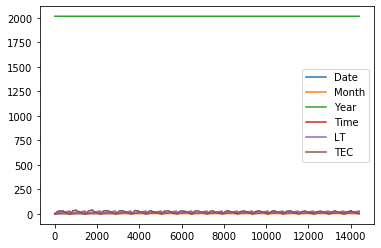

In [6]:
df = pd.read_csv('Train_TEC_mar17.csv')
print(df.head())
df.plot()

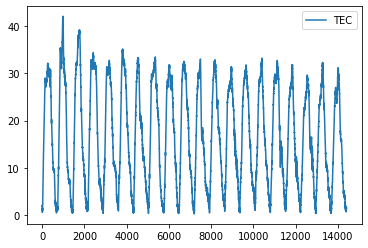

In [7]:
df.drop(["Date","Month","Year","LT","Time"], axis = 1, inplace =True)
df.plot()

In [9]:
print('Min', np.min(df))
print('Max', np.max(df))

Min TEC    0.285998
dtype: float64
Max TEC    42.039814
dtype: float64


In [10]:
dataset = df.astype('float32')

In [11]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(dataset)

In [12]:
print('Min', np.min(scaled))
print('Max', np.max(scaled))

Min 0.0
Max 1.0


In [13]:
print(scaled[:10])

[[0.04266832]
 [0.04303103]
 [0.04115252]
 [0.03474106]
 [0.03526637]
 [0.03025557]
 [0.03485418]
 [0.02574397]
 [0.01842535]
 [0.02058259]]


In [14]:
train_size = int(len(scaled) * 0.90)
test_size = len(scaled - train_size)
train, test = scaled[0:train_size, :], scaled[train_size: len(scaled), :]
print('train: {}\ntest: {}'.format(len(train), len(test)))

train: 12960
test: 1440


In [15]:
def create_dataset(dataset, look_back=1):
    print(len(dataset), look_back)
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        print(i)
        print('X {} to {}'.format(i, i+look_back))
        print(a)
        print('Y {}'.format(i + look_back))
        print(dataset[i + look_back, 0])
        dataset[i + look_back, 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [16]:
look_back = 1
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

12960 1
0
X 0 to 1
[0.04266832]
Y 1
0.043031033
1
X 1 to 2
[0.04303103]
Y 2
0.04115252
2
X 2 to 3
[0.04115252]
Y 3
0.03474106
3
X 3 to 4
[0.03474106]
Y 4
0.035266373
4
X 4 to 5
[0.03526637]
Y 5
0.030255575
5
X 5 to 6
[0.03025557]
Y 6
0.034854177
6
X 6 to 7
[0.03485418]
Y 7
0.025743965
7
X 7 to 8
[0.02574397]
Y 8
0.01842535
8
X 8 to 9
[0.01842535]
Y 9
0.020582587
9
X 9 to 10
[0.02058259]
Y 10
0.017967265
10
X 10 to 11
[0.01796727]
Y 11
0.024206739
11
X 11 to 12
[0.02420674]
Y 12
0.024663135
12
X 12 to 13
[0.02466314]
Y 13
0.023548555
13
X 13 to 14
[0.02354855]
Y 14
0.016204078
14
X 14 to 15
[0.01620408]
Y 15
0.007937857
15
X 15 to 16
[0.00793786]
Y 16
0.016824
16
X 16 to 17
[0.016824]
Y 17
0.019569427
17
X 17 to 18
[0.01956943]
Y 18
0.017386086
18
X 18 to 19
[0.01738609]
Y 19
0.017880876
19
X 19 to 20
[0.01788088]
Y 20
0.021256022
20
X 20 to 21
[0.02125602]
Y 21
0.029173873
21
X 21 to 22
[0.02917387]
Y 22
0.023423575
22
X 22 to 23
[0.02342357]
Y 23
0.016326033
23
X 23 to 24
[0.01632603]

Y 270
0.7515373
270
X 270 to 271
[0.7515373]
Y 271
0.75594807
271
X 271 to 272
[0.75594807]
Y 272
0.75866073
272
X 272 to 273
[0.75866073]
Y 273
0.7532871
273
X 273 to 274
[0.7532871]
Y 274
0.7611429
274
X 274 to 275
[0.7611429]
Y 275
0.75738406
275
X 275 to 276
[0.75738406]
Y 276
0.7537598
276
X 276 to 277
[0.7537598]
Y 277
0.74763393
277
X 277 to 278
[0.74763393]
Y 278
0.73728615
278
X 278 to 279
[0.73728615]
Y 279
0.73837125
279
X 279 to 280
[0.73837125]
Y 280
0.744544
280
X 280 to 281
[0.744544]
Y 281
0.73643017
281
X 281 to 282
[0.73643017]
Y 282
0.73297185
282
X 282 to 283
[0.73297185]
Y 283
0.7246956
283
X 283 to 284
[0.7246956]
Y 284
0.7308285
284
X 284 to 285
[0.7308285]
Y 285
0.72170246
285
X 285 to 286
[0.72170246]
Y 286
0.72179174
286
X 286 to 287
[0.72179174]
Y 287
0.71935856
287
X 287 to 288
[0.71935856]
Y 288
0.7247275
288
X 288 to 289
[0.7247275]
Y 289
0.71713245
289
X 289 to 290
[0.71713245]
Y 290
0.71342516
290
X 290 to 291
[0.71342516]
Y 291
0.71697396
291
X 291 to 2

Y 517
0.25446415
517
X 517 to 518
[0.25446415]
Y 518
0.2434248
518
X 518 to 519
[0.2434248]
Y 519
0.23926702
519
X 519 to 520
[0.23926702]
Y 520
0.23958448
520
X 520 to 521
[0.23958448]
Y 521
0.23355755
521
X 521 to 522
[0.23355755]
Y 522
0.24045353
522
X 522 to 523
[0.24045353]
Y 523
0.2413111
523
X 523 to 524
[0.2413111]
Y 524
0.23637101
524
X 524 to 525
[0.23637101]
Y 525
0.23263752
525
X 525 to 526
[0.23263752]
Y 526
0.22854228
526
X 526 to 527
[0.22854228]
Y 527
0.22915055
527
X 527 to 528
[0.22915055]
Y 528
0.23119995
528
X 528 to 529
[0.23119995]
Y 529
0.23521447
529
X 529 to 530
[0.23521447]
Y 530
0.23106253
530
X 530 to 531
[0.23106253]
Y 531
0.22272736
531
X 531 to 532
[0.22272736]
Y 532
0.22266056
532
X 532 to 533
[0.22266056]
Y 533
0.22613266
533
X 533 to 534
[0.22613266]
Y 534
0.2296728
534
X 534 to 535
[0.2296728]
Y 535
0.22946659
535
X 535 to 536
[0.22946659]
Y 536
0.22861302
536
X 536 to 537
[0.22861302]
Y 537
0.22795099
537
X 537 to 538
[0.22795099]
Y 538
0.22312047
53

0.030577525
694
X 694 to 695
[0.03057753]
Y 695
0.034262545
695
X 695 to 696
[0.03426255]
Y 696
0.030410983
696
X 696 to 697
[0.03041098]
Y 697
0.028012503
697
X 697 to 698
[0.0280125]
Y 698
0.022551551
698
X 698 to 699
[0.02255155]
Y 699
0.017748058
699
X 699 to 700
[0.01774806]
Y 700
0.022762883
700
X 700 to 701
[0.02276288]
Y 701
0.020044878
701
X 701 to 702
[0.02004488]
Y 702
0.022865392
702
X 702 to 703
[0.02286539]
Y 703
0.013412182
703
X 703 to 704
[0.01341218]
Y 704
0.016099766
704
X 704 to 705
[0.01609977]
Y 705
0.01579725
705
X 705 to 706
[0.01579725]
Y 706
0.02006011
706
X 706 to 707
[0.02006011]
Y 707
0.02606279
707
X 707 to 708
[0.02606279]
Y 708
0.021917306
708
X 708 to 709
[0.02191731]
Y 709
0.022165928
709
X 709 to 710
[0.02216593]
Y 710
0.025420077
710
X 710 to 711
[0.02542008]
Y 711
0.019902043
711
X 711 to 712
[0.01990204]
Y 712
0.018791337
712
X 712 to 713
[0.01879134]
Y 713
0.017615963
713
X 713 to 714
[0.01761596]
Y 714
0.016649943
714
X 714 to 715
[0.01664994]
Y 

[0.92618775]
Y 966
0.9231463
966
X 966 to 967
[0.9231463]
Y 967
0.929616
967
X 967 to 968
[0.929616]
Y 968
0.929834
968
X 968 to 969
[0.929834]
Y 969
0.938402
969
X 969 to 970
[0.938402]
Y 970
0.9468154
970
X 970 to 971
[0.9468154]
Y 971
0.9592412
971
X 971 to 972
[0.9592412]
Y 972
0.95186514
972
X 972 to 973
[0.95186514]
Y 973
0.9553379
973
X 973 to 974
[0.9553379]
Y 974
0.96444625
974
X 974 to 975
[0.96444625]
Y 975
0.97802764
975
X 975 to 976
[0.97802764]
Y 976
0.97851497
976
X 976 to 977
[0.97851497]
Y 977
0.98392576
977
X 977 to 978
[0.98392576]
Y 978
0.9873298
978
X 978 to 979
[0.9873298]
Y 979
0.98850715
979
X 979 to 980
[0.98850715]
Y 980
0.9876163
980
X 980 to 981
[0.9876163]
Y 981
0.9939372
981
X 981 to 982
[0.9939372]
Y 982
0.9872425
982
X 982 to 983
[0.9872425]
Y 983
0.9840253
983
X 983 to 984
[0.9840253]
Y 984
0.9820814
984
X 984 to 985
[0.9820814]
Y 985
0.9888693
985
X 985 to 986
[0.9888693]
Y 986
0.99334735
986
X 986 to 987
[0.99334735]
Y 987
0.9900128
987
X 987 to 988
[

1146
X 1146 to 1147
[0.51950216]
Y 1147
0.51714665
1147
X 1147 to 1148
[0.51714665]
Y 1148
0.50437886
1148
X 1148 to 1149
[0.50437886]
Y 1149
0.5021405
1149
X 1149 to 1150
[0.5021405]
Y 1150
0.5010497
1150
X 1150 to 1151
[0.5010497]
Y 1151
0.49029484
1151
X 1151 to 1152
[0.49029484]
Y 1152
0.4768293
1152
X 1152 to 1153
[0.4768293]
Y 1153
0.4738708
1153
X 1153 to 1154
[0.4738708]
Y 1154
0.45724404
1154
X 1154 to 1155
[0.45724404]
Y 1155
0.44524732
1155
X 1155 to 1156
[0.44524732]
Y 1156
0.439423
1156
X 1156 to 1157
[0.439423]
Y 1157
0.42722085
1157
X 1157 to 1158
[0.42722085]
Y 1158
0.4179036
1158
X 1158 to 1159
[0.4179036]
Y 1159
0.42108396
1159
X 1159 to 1160
[0.42108396]
Y 1160
0.4165468
1160
X 1160 to 1161
[0.4165468]
Y 1161
0.41032183
1161
X 1161 to 1162
[0.41032183]
Y 1162
0.4035237
1162
X 1162 to 1163
[0.4035237]
Y 1163
0.3902047
1163
X 1163 to 1164
[0.3902047]
Y 1164
0.37462196
1164
X 1164 to 1165
[0.37462196]
Y 1165
0.3749734
1165
X 1165 to 1166
[0.3749734]
Y 1166
0.37461787
11

1315
X 1315 to 1316
[0.15983209]
Y 1316
0.16395475
1316
X 1316 to 1317
[0.16395475]
Y 1317
0.16452126
1317
X 1317 to 1318
[0.16452126]
Y 1318
0.16420822
1318
X 1318 to 1319
[0.16420822]
Y 1319
0.16473189
1319
X 1319 to 1320
[0.16473189]
Y 1320
0.16987969
1320
X 1320 to 1321
[0.16987969]
Y 1321
0.15831888
1321
X 1321 to 1322
[0.15831888]
Y 1322
0.16293092
1322
X 1322 to 1323
[0.16293092]
Y 1323
0.15943532
1323
X 1323 to 1324
[0.15943532]
Y 1324
0.15702209
1324
X 1324 to 1325
[0.15702209]
Y 1325
0.15035538
1325
X 1325 to 1326
[0.15035538]
Y 1326
0.15155132
1326
X 1326 to 1327
[0.15155132]
Y 1327
0.14534354
1327
X 1327 to 1328
[0.14534354]
Y 1328
0.13383232
1328
X 1328 to 1329
[0.13383232]
Y 1329
0.13427505
1329
X 1329 to 1330
[0.13427505]
Y 1330
0.12798591
1330
X 1330 to 1331
[0.12798591]
Y 1331
0.12197842
1331
X 1331 to 1332
[0.12197842]
Y 1332
0.119883746
1332
X 1332 to 1333
[0.11988375]
Y 1333
0.11654084
1333
X 1333 to 1334
[0.11654084]
Y 1334
0.11417795
1334
X 1334 to 1335
[0.1141779

1483
X 1483 to 1484
[0.13833971]
Y 1484
0.14299043
1484
X 1484 to 1485
[0.14299043]
Y 1485
0.15465033
1485
X 1485 to 1486
[0.15465033]
Y 1486
0.15321995
1486
X 1486 to 1487
[0.15321995]
Y 1487
0.16261415
1487
X 1487 to 1488
[0.16261415]
Y 1488
0.17097533
1488
X 1488 to 1489
[0.17097533]
Y 1489
0.17222765
1489
X 1489 to 1490
[0.17222765]
Y 1490
0.18125996
1490
X 1490 to 1491
[0.18125996]
Y 1491
0.18668096
1491
X 1491 to 1492
[0.18668096]
Y 1492
0.19725357
1492
X 1492 to 1493
[0.19725357]
Y 1493
0.19764292
1493
X 1493 to 1494
[0.19764292]
Y 1494
0.20213401
1494
X 1494 to 1495
[0.20213401]
Y 1495
0.21054812
1495
X 1495 to 1496
[0.21054812]
Y 1496
0.21577175
1496
X 1496 to 1497
[0.21577175]
Y 1497
0.2195703
1497
X 1497 to 1498
[0.2195703]
Y 1498
0.22946179
1498
X 1498 to 1499
[0.22946179]
Y 1499
0.23009162
1499
X 1499 to 1500
[0.23009162]
Y 1500
0.22577393
1500
X 1500 to 1501
[0.22577393]
Y 1501
0.23171298
1501
X 1501 to 1502
[0.23171298]
Y 1502
0.24051134
1502
X 1502 to 1503
[0.24051134]


0.75918883
1654
X 1654 to 1655
[0.75918883]
Y 1655
0.7604772
1655
X 1655 to 1656
[0.7604772]
Y 1656
0.75854635
1656
X 1656 to 1657
[0.75854635]
Y 1657
0.75997996
1657
X 1657 to 1658
[0.75997996]
Y 1658
0.7590294
1658
X 1658 to 1659
[0.7590294]
Y 1659
0.7642265
1659
X 1659 to 1660
[0.7642265]
Y 1660
0.7679958
1660
X 1660 to 1661
[0.7679958]
Y 1661
0.7708822
1661
X 1661 to 1662
[0.7708822]
Y 1662
0.7722228
1662
X 1662 to 1663
[0.7722228]
Y 1663
0.7704651
1663
X 1663 to 1664
[0.7704651]
Y 1664
0.77182376
1664
X 1664 to 1665
[0.77182376]
Y 1665
0.77852887
1665
X 1665 to 1666
[0.77852887]
Y 1666
0.77993447
1666
X 1666 to 1667
[0.77993447]
Y 1667
0.7845139
1667
X 1667 to 1668
[0.7845139]
Y 1668
0.7862451
1668
X 1668 to 1669
[0.7862451]
Y 1669
0.79121953
1669
X 1669 to 1670
[0.79121953]
Y 1670
0.7896979
1670
X 1670 to 1671
[0.7896979]
Y 1671
0.7992902
1671
X 1671 to 1672
[0.7992902]
Y 1672
0.79680073
1672
X 1672 to 1673
[0.79680073]
Y 1673
0.7996246
1673
X 1673 to 1674
[0.7996246]
Y 1674
0.79

0.7079254
1821
X 1821 to 1822
[0.7079254]
Y 1822
0.71226496
1822
X 1822 to 1823
[0.71226496]
Y 1823
0.7120425
1823
X 1823 to 1824
[0.7120425]
Y 1824
0.7080393
1824
X 1824 to 1825
[0.7080393]
Y 1825
0.7011495
1825
X 1825 to 1826
[0.7011495]
Y 1826
0.704562
1826
X 1826 to 1827
[0.704562]
Y 1827
0.70115376
1827
X 1827 to 1828
[0.70115376]
Y 1828
0.6869388
1828
X 1828 to 1829
[0.6869388]
Y 1829
0.68536913
1829
X 1829 to 1830
[0.68536913]
Y 1830
0.6755135
1830
X 1830 to 1831
[0.6755135]
Y 1831
0.67263687
1831
X 1831 to 1832
[0.67263687]
Y 1832
0.6672455
1832
X 1832 to 1833
[0.6672455]
Y 1833
0.66458434
1833
X 1833 to 1834
[0.66458434]
Y 1834
0.65442854
1834
X 1834 to 1835
[0.65442854]
Y 1835
0.64125687
1835
X 1835 to 1836
[0.64125687]
Y 1836
0.6435733
1836
X 1836 to 1837
[0.6435733]
Y 1837
0.6404251
1837
X 1837 to 1838
[0.6404251]
Y 1838
0.6298375
1838
X 1838 to 1839
[0.6298375]
Y 1839
0.62213534
1839
X 1839 to 1840
[0.62213534]
Y 1840
0.61044127
1840
X 1840 to 1841
[0.61044127]
Y 1841
0.60

[0.13203713]
Y 2046
0.11725462
2046
X 2046 to 2047
[0.11725462]
Y 2047
0.11643384
2047
X 2047 to 2048
[0.11643384]
Y 2048
0.11170071
2048
X 2048 to 2049
[0.11170071]
Y 2049
0.10861826
2049
X 2049 to 2050
[0.10861826]
Y 2050
0.10307513
2050
X 2050 to 2051
[0.10307513]
Y 2051
0.09635261
2051
X 2051 to 2052
[0.09635261]
Y 2052
0.09944652
2052
X 2052 to 2053
[0.09944652]
Y 2053
0.09758171
2053
X 2053 to 2054
[0.09758171]
Y 2054
0.09429826
2054
X 2054 to 2055
[0.09429826]
Y 2055
0.09274213
2055
X 2055 to 2056
[0.09274213]
Y 2056
0.083984576
2056
X 2056 to 2057
[0.08398458]
Y 2057
0.09048732
2057
X 2057 to 2058
[0.09048732]
Y 2058
0.081708185
2058
X 2058 to 2059
[0.08170819]
Y 2059
0.075930215
2059
X 2059 to 2060
[0.07593022]
Y 2060
0.07608273
2060
X 2060 to 2061
[0.07608273]
Y 2061
0.06888057
2061
X 2061 to 2062
[0.06888057]
Y 2062
0.06917309
2062
X 2062 to 2063
[0.06917309]
Y 2063
0.07187928
2063
X 2063 to 2064
[0.07187928]
Y 2064
0.073130205
2064
X 2064 to 2065
[0.07313021]
Y 2065
0.08251

2208
X 2208 to 2209
[0.2166578]
Y 2209
0.23185375
2209
X 2209 to 2210
[0.23185375]
Y 2210
0.23000391
2210
X 2210 to 2211
[0.23000391]
Y 2211
0.23877293
2211
X 2211 to 2212
[0.23877293]
Y 2212
0.23875023
2212
X 2212 to 2213
[0.23875023]
Y 2213
0.24633548
2213
X 2213 to 2214
[0.24633548]
Y 2214
0.24142496
2214
X 2214 to 2215
[0.24142496]
Y 2215
0.24575865
2215
X 2215 to 2216
[0.24575865]
Y 2216
0.263933
2216
X 2216 to 2217
[0.263933]
Y 2217
0.258724
2217
X 2217 to 2218
[0.258724]
Y 2218
0.25911418
2218
X 2218 to 2219
[0.25911418]
Y 2219
0.2651772
2219
X 2219 to 2220
[0.2651772]
Y 2220
0.2735598
2220
X 2220 to 2221
[0.2735598]
Y 2221
0.28128326
2221
X 2221 to 2222
[0.28128326]
Y 2222
0.28437686
2222
X 2222 to 2223
[0.28437686]
Y 2223
0.29651892
2223
X 2223 to 2224
[0.29651892]
Y 2224
0.29284734
2224
X 2224 to 2225
[0.29284734]
Y 2225
0.29739693
2225
X 2225 to 2226
[0.29739693]
Y 2226
0.30081764
2226
X 2226 to 2227
[0.30081764]
Y 2227
0.29798707
2227
X 2227 to 2228
[0.29798707]
Y 2228
0.30

2456
X 2456 to 2457
[0.7501415]
Y 2457
0.7412824
2457
X 2457 to 2458
[0.7412824]
Y 2458
0.73902327
2458
X 2458 to 2459
[0.73902327]
Y 2459
0.7439555
2459
X 2459 to 2460
[0.7439555]
Y 2460
0.73558414
2460
X 2460 to 2461
[0.73558414]
Y 2461
0.7412904
2461
X 2461 to 2462
[0.7412904]
Y 2462
0.74885505
2462
X 2462 to 2463
[0.74885505]
Y 2463
0.74377817
2463
X 2463 to 2464
[0.74377817]
Y 2464
0.74561983
2464
X 2464 to 2465
[0.74561983]
Y 2465
0.7403102
2465
X 2465 to 2466
[0.7403102]
Y 2466
0.7460408
2466
X 2466 to 2467
[0.7460408]
Y 2467
0.73927104
2467
X 2467 to 2468
[0.73927104]
Y 2468
0.7320846
2468
X 2468 to 2469
[0.7320846]
Y 2469
0.7374685
2469
X 2469 to 2470
[0.7374685]
Y 2470
0.74244183
2470
X 2470 to 2471
[0.74244183]
Y 2471
0.7542891
2471
X 2471 to 2472
[0.7542891]
Y 2472
0.753316
2472
X 2472 to 2473
[0.753316]
Y 2473
0.754034
2473
X 2473 to 2474
[0.754034]
Y 2474
0.75290084
2474
X 2474 to 2475
[0.75290084]
Y 2475
0.74241793
2475
X 2475 to 2476
[0.74241793]
Y 2476
0.7427153
2476
X

Y 2640
0.35846746
2640
X 2640 to 2641
[0.35846746]
Y 2641
0.35163426
2641
X 2641 to 2642
[0.35163426]
Y 2642
0.35165083
2642
X 2642 to 2643
[0.35165083]
Y 2643
0.3417467
2643
X 2643 to 2644
[0.3417467]
Y 2644
0.33080247
2644
X 2644 to 2645
[0.33080247]
Y 2645
0.32613215
2645
X 2645 to 2646
[0.32613215]
Y 2646
0.31039163
2646
X 2646 to 2647
[0.31039163]
Y 2647
0.31065217
2647
X 2647 to 2648
[0.31065217]
Y 2648
0.31333563
2648
X 2648 to 2649
[0.31333563]
Y 2649
0.3083969
2649
X 2649 to 2650
[0.3083969]
Y 2650
0.30301145
2650
X 2650 to 2651
[0.30301145]
Y 2651
0.30026034
2651
X 2651 to 2652
[0.30026034]
Y 2652
0.2997133
2652
X 2652 to 2653
[0.2997133]
Y 2653
0.29117692
2653
X 2653 to 2654
[0.29117692]
Y 2654
0.28233987
2654
X 2654 to 2655
[0.28233987]
Y 2655
0.27485824
2655
X 2655 to 2656
[0.27485824]
Y 2656
0.27460277
2656
X 2656 to 2657
[0.27460277]
Y 2657
0.2690965
2657
X 2657 to 2658
[0.2690965]
Y 2658
0.2664019
2658
X 2658 to 2659
[0.2664019]
Y 2659
0.25649256
2659
X 2659 to 2660
[0.

[0.04028641]
Y 2904
0.04746637
2904
X 2904 to 2905
[0.04746637]
Y 2905
0.053639203
2905
X 2905 to 2906
[0.0536392]
Y 2906
0.06172641
2906
X 2906 to 2907
[0.06172641]
Y 2907
0.06962594
2907
X 2907 to 2908
[0.06962594]
Y 2908
0.077765435
2908
X 2908 to 2909
[0.07776543]
Y 2909
0.07755743
2909
X 2909 to 2910
[0.07755743]
Y 2910
0.07650125
2910
X 2910 to 2911
[0.07650125]
Y 2911
0.086580895
2911
X 2911 to 2912
[0.08658089]
Y 2912
0.09733791
2912
X 2912 to 2913
[0.09733791]
Y 2913
0.102798045
2913
X 2913 to 2914
[0.10279804]
Y 2914
0.10847715
2914
X 2914 to 2915
[0.10847715]
Y 2915
0.11814073
2915
X 2915 to 2916
[0.11814073]
Y 2916
0.12929091
2916
X 2916 to 2917
[0.12929091]
Y 2917
0.13053043
2917
X 2917 to 2918
[0.13053043]
Y 2918
0.13836029
2918
X 2918 to 2919
[0.13836029]
Y 2919
0.14275718
2919
X 2919 to 2920
[0.14275718]
Y 2920
0.13998532
2920
X 2920 to 2921
[0.13998532]
Y 2921
0.14319757
2921
X 2921 to 2922
[0.14319757]
Y 2922
0.15025254
2922
X 2922 to 2923
[0.15025254]
Y 2923
0.150975

X 3100 to 3101
[0.73752975]
Y 3101
0.7311986
3101
X 3101 to 3102
[0.7311986]
Y 3102
0.73060477
3102
X 3102 to 3103
[0.73060477]
Y 3103
0.7361222
3103
X 3103 to 3104
[0.7361222]
Y 3104
0.72760147
3104
X 3104 to 3105
[0.72760147]
Y 3105
0.7233665
3105
X 3105 to 3106
[0.7233665]
Y 3106
0.7156044
3106
X 3106 to 3107
[0.7156044]
Y 3107
0.7146835
3107
X 3107 to 3108
[0.7146835]
Y 3108
0.71462893
3108
X 3108 to 3109
[0.71462893]
Y 3109
0.7092321
3109
X 3109 to 3110
[0.7092321]
Y 3110
0.70285517
3110
X 3110 to 3111
[0.70285517]
Y 3111
0.7005315
3111
X 3111 to 3112
[0.7005315]
Y 3112
0.7052211
3112
X 3112 to 3113
[0.7052211]
Y 3113
0.70920396
3113
X 3113 to 3114
[0.70920396]
Y 3114
0.710861
3114
X 3114 to 3115
[0.710861]
Y 3115
0.71037585
3115
X 3115 to 3116
[0.71037585]
Y 3116
0.70859617
3116
X 3116 to 3117
[0.70859617]
Y 3117
0.7103605
3117
X 3117 to 3118
[0.7103605]
Y 3118
0.7144769
3118
X 3118 to 3119
[0.7144769]
Y 3119
0.72211766
3119
X 3119 to 3120
[0.72211766]
Y 3120
0.7252469
3120
X 312

[0.6646843]
Y 3269
0.65809417
3269
X 3269 to 3270
[0.65809417]
Y 3270
0.657082
3270
X 3270 to 3271
[0.657082]
Y 3271
0.65357244
3271
X 3271 to 3272
[0.65357244]
Y 3272
0.6494783
3272
X 3272 to 3273
[0.6494783]
Y 3273
0.65621555
3273
X 3273 to 3274
[0.65621555]
Y 3274
0.65032893
3274
X 3274 to 3275
[0.65032893]
Y 3275
0.64168555
3275
X 3275 to 3276
[0.64168555]
Y 3276
0.63353306
3276
X 3276 to 3277
[0.63353306]
Y 3277
0.6255015
3277
X 3277 to 3278
[0.6255015]
Y 3278
0.6278991
3278
X 3278 to 3279
[0.6278991]
Y 3279
0.6277629
3279
X 3279 to 3280
[0.6277629]
Y 3280
0.6242666
3280
X 3280 to 3281
[0.6242666]
Y 3281
0.62358326
3281
X 3281 to 3282
[0.62358326]
Y 3282
0.62242764
3282
X 3282 to 3283
[0.62242764]
Y 3283
0.61577404
3283
X 3283 to 3284
[0.61577404]
Y 3284
0.61868066
3284
X 3284 to 3285
[0.61868066]
Y 3285
0.6116909
3285
X 3285 to 3286
[0.6116909]
Y 3286
0.6103326
3286
X 3286 to 3287
[0.6103326]
Y 3287
0.60550416
3287
X 3287 to 3288
[0.60550416]
Y 3288
0.6070773
3288
X 3288 to 3289


Y 3509
0.15858378
3509
X 3509 to 3510
[0.15858378]
Y 3510
0.15225194
3510
X 3510 to 3511
[0.15225194]
Y 3511
0.14927806
3511
X 3511 to 3512
[0.14927806]
Y 3512
0.14004976
3512
X 3512 to 3513
[0.14004976]
Y 3513
0.14086431
3513
X 3513 to 3514
[0.14086431]
Y 3514
0.1379397
3514
X 3514 to 3515
[0.1379397]
Y 3515
0.13492867
3515
X 3515 to 3516
[0.13492867]
Y 3516
0.13578366
3516
X 3516 to 3517
[0.13578366]
Y 3517
0.12883991
3517
X 3517 to 3518
[0.12883991]
Y 3518
0.12106088
3518
X 3518 to 3519
[0.12106088]
Y 3519
0.10869493
3519
X 3519 to 3520
[0.10869493]
Y 3520
0.101431616
3520
X 3520 to 3521
[0.10143162]
Y 3521
0.09651262
3521
X 3521 to 3522
[0.09651262]
Y 3522
0.09823733
3522
X 3522 to 3523
[0.09823733]
Y 3523
0.09547388
3523
X 3523 to 3524
[0.09547388]
Y 3524
0.09633375
3524
X 3524 to 3525
[0.09633375]
Y 3525
0.09872203
3525
X 3525 to 3526
[0.09872203]
Y 3526
0.08730934
3526
X 3526 to 3527
[0.08730934]
Y 3527
0.07057473
3527
X 3527 to 3528
[0.07057473]
Y 3528
0.07478909
3528
X 3528 to

0.22714557
3674
X 3674 to 3675
[0.22714557]
Y 3675
0.2328181
3675
X 3675 to 3676
[0.2328181]
Y 3676
0.22975785
3676
X 3676 to 3677
[0.22975785]
Y 3677
0.23464303
3677
X 3677 to 3678
[0.23464303]
Y 3678
0.23918824
3678
X 3678 to 3679
[0.23918824]
Y 3679
0.24842685
3679
X 3679 to 3680
[0.24842685]
Y 3680
0.24908274
3680
X 3680 to 3681
[0.24908274]
Y 3681
0.24857804
3681
X 3681 to 3682
[0.24857804]
Y 3682
0.25263155
3682
X 3682 to 3683
[0.25263155]
Y 3683
0.24850243
3683
X 3683 to 3684
[0.24850243]
Y 3684
0.26368642
3684
X 3684 to 3685
[0.26368642]
Y 3685
0.25479797
3685
X 3685 to 3686
[0.25479797]
Y 3686
0.2660784
3686
X 3686 to 3687
[0.2660784]
Y 3687
0.2684916
3687
X 3687 to 3688
[0.2684916]
Y 3688
0.27026117
3688
X 3688 to 3689
[0.27026117]
Y 3689
0.27256066
3689
X 3689 to 3690
[0.27256066]
Y 3690
0.27224332
3690
X 3690 to 3691
[0.27224332]
Y 3691
0.28608716
3691
X 3691 to 3692
[0.28608716]
Y 3692
0.29292467
3692
X 3692 to 3693
[0.29292467]
Y 3693
0.30027696
3693
X 3693 to 3694
[0.300

Y 3905
0.7278976
3905
X 3905 to 3906
[0.7278976]
Y 3906
0.7283311
3906
X 3906 to 3907
[0.7283311]
Y 3907
0.7310959
3907
X 3907 to 3908
[0.7310959]
Y 3908
0.7235459
3908
X 3908 to 3909
[0.7235459]
Y 3909
0.7151333
3909
X 3909 to 3910
[0.7151333]
Y 3910
0.71310395
3910
X 3910 to 3911
[0.71310395]
Y 3911
0.7095441
3911
X 3911 to 3912
[0.7095441]
Y 3912
0.7134813
3912
X 3912 to 3913
[0.7134813]
Y 3913
0.7165777
3913
X 3913 to 3914
[0.7165777]
Y 3914
0.7263667
3914
X 3914 to 3915
[0.7263667]
Y 3915
0.71425015
3915
X 3915 to 3916
[0.71425015]
Y 3916
0.7156144
3916
X 3916 to 3917
[0.7156144]
Y 3917
0.7083393
3917
X 3917 to 3918
[0.7083393]
Y 3918
0.70387197
3918
X 3918 to 3919
[0.70387197]
Y 3919
0.7068375
3919
X 3919 to 3920
[0.7068375]
Y 3920
0.7100642
3920
X 3920 to 3921
[0.7100642]
Y 3921
0.71163315
3921
X 3921 to 3922
[0.71163315]
Y 3922
0.7094366
3922
X 3922 to 3923
[0.7094366]
Y 3923
0.70492977
3923
X 3923 to 3924
[0.70492977]
Y 3924
0.7055457
3924
X 3924 to 3925
[0.7055457]
Y 3925
0.7

X 4070 to 4071
[0.39472255]
Y 4071
0.38881463
4071
X 4071 to 4072
[0.38881463]
Y 4072
0.38884747
4072
X 4072 to 4073
[0.38884747]
Y 4073
0.3861939
4073
X 4073 to 4074
[0.3861939]
Y 4074
0.38208616
4074
X 4074 to 4075
[0.38208616]
Y 4075
0.38299
4075
X 4075 to 4076
[0.38299]
Y 4076
0.3770637
4076
X 4076 to 4077
[0.3770637]
Y 4077
0.3734576
4077
X 4077 to 4078
[0.3734576]
Y 4078
0.36910078
4078
X 4078 to 4079
[0.36910078]
Y 4079
0.3673882
4079
X 4079 to 4080
[0.3673882]
Y 4080
0.36557752
4080
X 4080 to 4081
[0.36557752]
Y 4081
0.35601044
4081
X 4081 to 4082
[0.35601044]
Y 4082
0.3559736
4082
X 4082 to 4083
[0.3559736]
Y 4083
0.35252
4083
X 4083 to 4084
[0.35252]
Y 4084
0.35222057
4084
X 4084 to 4085
[0.35222057]
Y 4085
0.34864774
4085
X 4085 to 4086
[0.34864774]
Y 4086
0.34774938
4086
X 4086 to 4087
[0.34774938]
Y 4087
0.34337032
4087
X 4087 to 4088
[0.34337032]
Y 4088
0.3414786
4088
X 4088 to 4089
[0.3414786]
Y 4089
0.33406153
4089
X 4089 to 4090
[0.33406153]
Y 4090
0.32682258
4090
X 40

Y 4234
0.09475869
4234
X 4234 to 4235
[0.09475869]
Y 4235
0.08586382
4235
X 4235 to 4236
[0.08586382]
Y 4236
0.091928676
4236
X 4236 to 4237
[0.09192868]
Y 4237
0.08928457
4237
X 4237 to 4238
[0.08928457]
Y 4238
0.081452616
4238
X 4238 to 4239
[0.08145262]
Y 4239
0.079048745
4239
X 4239 to 4240
[0.07904875]
Y 4240
0.07241502
4240
X 4240 to 4241
[0.07241502]
Y 4241
0.07493813
4241
X 4241 to 4242
[0.07493813]
Y 4242
0.072446086
4242
X 4242 to 4243
[0.07244609]
Y 4243
0.072811306
4243
X 4243 to 4244
[0.07281131]
Y 4244
0.06920004
4244
X 4244 to 4245
[0.06920004]
Y 4245
0.06152224
4245
X 4245 to 4246
[0.06152224]
Y 4246
0.060549695
4246
X 4246 to 4247
[0.0605497]
Y 4247
0.06041765
4247
X 4247 to 4248
[0.06041765]
Y 4248
0.059494745
4248
X 4248 to 4249
[0.05949474]
Y 4249
0.06308134
4249
X 4249 to 4250
[0.06308134]
Y 4250
0.06783685
4250
X 4250 to 4251
[0.06783685]
Y 4251
0.06953424
4251
X 4251 to 4252
[0.06953424]
Y 4252
0.0725466
4252
X 4252 to 4253
[0.0725466]
Y 4253
0.06597726
4253
X 42

X 4402 to 4403
[0.386299]
Y 4403
0.38802594
4403
X 4403 to 4404
[0.38802594]
Y 4404
0.39149708
4404
X 4404 to 4405
[0.39149708]
Y 4405
0.3906996
4405
X 4405 to 4406
[0.3906996]
Y 4406
0.40349415
4406
X 4406 to 4407
[0.40349415]
Y 4407
0.39930153
4407
X 4407 to 4408
[0.39930153]
Y 4408
0.4077472
4408
X 4408 to 4409
[0.4077472]
Y 4409
0.42043945
4409
X 4409 to 4410
[0.42043945]
Y 4410
0.4286585
4410
X 4410 to 4411
[0.4286585]
Y 4411
0.43968073
4411
X 4411 to 4412
[0.43968073]
Y 4412
0.4399581
4412
X 4412 to 4413
[0.4399581]
Y 4413
0.44162703
4413
X 4413 to 4414
[0.44162703]
Y 4414
0.4519756
4414
X 4414 to 4415
[0.4519756]
Y 4415
0.44706416
4415
X 4415 to 4416
[0.44706416]
Y 4416
0.45113838
4416
X 4416 to 4417
[0.45113838]
Y 4417
0.45611015
4417
X 4417 to 4418
[0.45611015]
Y 4418
0.46401
4418
X 4418 to 4419
[0.46401]
Y 4419
0.4703876
4419
X 4419 to 4420
[0.4703876]
Y 4420
0.47415367
4420
X 4420 to 4421
[0.47415367]
Y 4421
0.47331482
4421
X 4421 to 4422
[0.47331482]
Y 4422
0.47801155
4422


[0.49379554]
Y 4635
0.49248323
4635
X 4635 to 4636
[0.49248323]
Y 4636
0.48197377
4636
X 4636 to 4637
[0.48197377]
Y 4637
0.4814525
4637
X 4637 to 4638
[0.4814525]
Y 4638
0.48970807
4638
X 4638 to 4639
[0.48970807]
Y 4639
0.48245975
4639
X 4639 to 4640
[0.48245975]
Y 4640
0.48029664
4640
X 4640 to 4641
[0.48029664]
Y 4641
0.4771823
4641
X 4641 to 4642
[0.4771823]
Y 4642
0.47066578
4642
X 4642 to 4643
[0.47066578]
Y 4643
0.47688463
4643
X 4643 to 4644
[0.47688463]
Y 4644
0.4767217
4644
X 4644 to 4645
[0.4767217]
Y 4645
0.48052204
4645
X 4645 to 4646
[0.48052204]
Y 4646
0.4933329
4646
X 4646 to 4647
[0.4933329]
Y 4647
0.49427316
4647
X 4647 to 4648
[0.49427316]
Y 4648
0.5011315
4648
X 4648 to 4649
[0.5011315]
Y 4649
0.49963996
4649
X 4649 to 4650
[0.49963996]
Y 4650
0.48972574
4650
X 4650 to 4651
[0.48972574]
Y 4651
0.48681128
4651
X 4651 to 4652
[0.48681128]
Y 4652
0.49478605
4652
X 4652 to 4653
[0.49478605]
Y 4653
0.49524054
4653
X 4653 to 4654
[0.49524054]
Y 4654
0.48593616
4654
X 465

[0.2276657]
Y 4862
0.22511803
4862
X 4862 to 4863
[0.22511803]
Y 4863
0.22439235
4863
X 4863 to 4864
[0.22439235]
Y 4864
0.22572173
4864
X 4864 to 4865
[0.22572173]
Y 4865
0.22147608
4865
X 4865 to 4866
[0.22147608]
Y 4866
0.21883851
4866
X 4866 to 4867
[0.21883851]
Y 4867
0.2232458
4867
X 4867 to 4868
[0.2232458]
Y 4868
0.22035052
4868
X 4868 to 4869
[0.22035052]
Y 4869
0.21477124
4869
X 4869 to 4870
[0.21477124]
Y 4870
0.21378349
4870
X 4870 to 4871
[0.21378349]
Y 4871
0.2125176
4871
X 4871 to 4872
[0.2125176]
Y 4872
0.21701749
4872
X 4872 to 4873
[0.21701749]
Y 4873
0.20918089
4873
X 4873 to 4874
[0.20918089]
Y 4874
0.21044324
4874
X 4874 to 4875
[0.21044324]
Y 4875
0.21010806
4875
X 4875 to 4876
[0.21010806]
Y 4876
0.20585775
4876
X 4876 to 4877
[0.20585775]
Y 4877
0.20203817
4877
X 4877 to 4878
[0.20203817]
Y 4878
0.20512421
4878
X 4878 to 4879
[0.20512421]
Y 4879
0.20093253
4879
X 4879 to 4880
[0.20093253]
Y 4880
0.2017174
4880
X 4880 to 4881
[0.2017174]
Y 4881
0.20120952
4881
X 

5048
X 5048 to 5049
[0.03190216]
Y 5049
0.033129595
5049
X 5049 to 5050
[0.0331296]
Y 5050
0.04640822
5050
X 5050 to 5051
[0.04640822]
Y 5051
0.059419375
5051
X 5051 to 5052
[0.05941937]
Y 5052
0.057848018
5052
X 5052 to 5053
[0.05784802]
Y 5053
0.05817477
5053
X 5053 to 5054
[0.05817477]
Y 5054
0.056316543
5054
X 5054 to 5055
[0.05631654]
Y 5055
0.05384451
5055
X 5055 to 5056
[0.05384451]
Y 5056
0.060169104
5056
X 5056 to 5057
[0.0601691]
Y 5057
0.06622489
5057
X 5057 to 5058
[0.06622489]
Y 5058
0.06359463
5058
X 5058 to 5059
[0.06359463]
Y 5059
0.069826655
5059
X 5059 to 5060
[0.06982666]
Y 5060
0.086842254
5060
X 5060 to 5061
[0.08684225]
Y 5061
0.09920152
5061
X 5061 to 5062
[0.09920152]
Y 5062
0.103351526
5062
X 5062 to 5063
[0.10335153]
Y 5063
0.10735604
5063
X 5063 to 5064
[0.10735604]
Y 5064
0.10769709
5064
X 5064 to 5065
[0.10769709]
Y 5065
0.10383317
5065
X 5065 to 5066
[0.10383317]
Y 5066
0.1127726
5066
X 5066 to 5067
[0.1127726]
Y 5067
0.12527993
5067
X 5067 to 5068
[0.1252

X 5214 to 5215
[0.69018817]
Y 5215
0.68663085
5215
X 5215 to 5216
[0.68663085]
Y 5216
0.687899
5216
X 5216 to 5217
[0.687899]
Y 5217
0.68732524
5217
X 5217 to 5218
[0.68732524]
Y 5218
0.69985676
5218
X 5218 to 5219
[0.69985676]
Y 5219
0.6971783
5219
X 5219 to 5220
[0.6971783]
Y 5220
0.6953594
5220
X 5220 to 5221
[0.6953594]
Y 5221
0.69229555
5221
X 5221 to 5222
[0.69229555]
Y 5222
0.7002145
5222
X 5222 to 5223
[0.7002145]
Y 5223
0.6971376
5223
X 5223 to 5224
[0.6971376]
Y 5224
0.69506395
5224
X 5224 to 5225
[0.69506395]
Y 5225
0.70326906
5225
X 5225 to 5226
[0.70326906]
Y 5226
0.69789696
5226
X 5226 to 5227
[0.69789696]
Y 5227
0.6991971
5227
X 5227 to 5228
[0.6991971]
Y 5228
0.69809103
5228
X 5228 to 5229
[0.69809103]
Y 5229
0.6960268
5229
X 5229 to 5230
[0.6960268]
Y 5230
0.6967897
5230
X 5230 to 5231
[0.6967897]
Y 5231
0.69859827
5231
X 5231 to 5232
[0.69859827]
Y 5232
0.70532835
5232
X 5232 to 5233
[0.70532835]
Y 5233
0.69808924
5233
X 5233 to 5234
[0.69808924]
Y 5234
0.7072646
5234

[0.5275683]
Y 5471
0.52074605
5471
X 5471 to 5472
[0.52074605]
Y 5472
0.5137998
5472
X 5472 to 5473
[0.5137998]
Y 5473
0.50693774
5473
X 5473 to 5474
[0.50693774]
Y 5474
0.5168797
5474
X 5474 to 5475
[0.5168797]
Y 5475
0.52356684
5475
X 5475 to 5476
[0.52356684]
Y 5476
0.5210597
5476
X 5476 to 5477
[0.5210597]
Y 5477
0.5156964
5477
X 5477 to 5478
[0.5156964]
Y 5478
0.5112107
5478
X 5478 to 5479
[0.5112107]
Y 5479
0.5066584
5479
X 5479 to 5480
[0.5066584]
Y 5480
0.50124353
5480
X 5480 to 5481
[0.50124353]
Y 5481
0.4998727
5481
X 5481 to 5482
[0.4998727]
Y 5482
0.500209
5482
X 5482 to 5483
[0.500209]
Y 5483
0.49307656
5483
X 5483 to 5484
[0.49307656]
Y 5484
0.49474338
5484
X 5484 to 5485
[0.49474338]
Y 5485
0.4908572
5485
X 5485 to 5486
[0.4908572]
Y 5486
0.4962171
5486
X 5486 to 5487
[0.4962171]
Y 5487
0.49222034
5487
X 5487 to 5488
[0.49222034]
Y 5488
0.4908691
5488
X 5488 to 5489
[0.4908691]
Y 5489
0.49253717
5489
X 5489 to 5490
[0.49253717]
Y 5490
0.4978253
5490
X 5490 to 5491
[0.497

[0.05388628]
Y 5681
0.04502235
5681
X 5681 to 5682
[0.04502235]
Y 5682
0.04445749
5682
X 5682 to 5683
[0.04445749]
Y 5683
0.0458158
5683
X 5683 to 5684
[0.0458158]
Y 5684
0.044754982
5684
X 5684 to 5685
[0.04475498]
Y 5685
0.049976118
5685
X 5685 to 5686
[0.04997612]
Y 5686
0.0516242
5686
X 5686 to 5687
[0.0516242]
Y 5687
0.050980758
5687
X 5687 to 5688
[0.05098076]
Y 5688
0.0503522
5688
X 5688 to 5689
[0.0503522]
Y 5689
0.0483987
5689
X 5689 to 5690
[0.0483987]
Y 5690
0.052229054
5690
X 5690 to 5691
[0.05222905]
Y 5691
0.042606756
5691
X 5691 to 5692
[0.04260676]
Y 5692
0.036391914
5692
X 5692 to 5693
[0.03639191]
Y 5693
0.040240657
5693
X 5693 to 5694
[0.04024066]
Y 5694
0.046071775
5694
X 5694 to 5695
[0.04607178]
Y 5695
0.054415934
5695
X 5695 to 5696
[0.05441593]
Y 5696
0.04094013
5696
X 5696 to 5697
[0.04094013]
Y 5697
0.04316066
5697
X 5697 to 5698
[0.04316066]
Y 5698
0.044594914
5698
X 5698 to 5699
[0.04459491]
Y 5699
0.039876748
5699
X 5699 to 5700
[0.03987675]
Y 5700
0.037091

X 5854 to 5855
[0.38370275]
Y 5855
0.38602218
5855
X 5855 to 5856
[0.38602218]
Y 5856
0.40190533
5856
X 5856 to 5857
[0.40190533]
Y 5857
0.4050195
5857
X 5857 to 5858
[0.4050195]
Y 5858
0.41852224
5858
X 5858 to 5859
[0.41852224]
Y 5859
0.43014607
5859
X 5859 to 5860
[0.43014607]
Y 5860
0.43781686
5860
X 5860 to 5861
[0.43781686]
Y 5861
0.44196498
5861
X 5861 to 5862
[0.44196498]
Y 5862
0.44998726
5862
X 5862 to 5863
[0.44998726]
Y 5863
0.45598173
5863
X 5863 to 5864
[0.45598173]
Y 5864
0.4656383
5864
X 5864 to 5865
[0.4656383]
Y 5865
0.47139645
5865
X 5865 to 5866
[0.47139645]
Y 5866
0.4705581
5866
X 5866 to 5867
[0.4705581]
Y 5867
0.47795865
5867
X 5867 to 5868
[0.47795865]
Y 5868
0.48207074
5868
X 5868 to 5869
[0.48207074]
Y 5869
0.5029919
5869
X 5869 to 5870
[0.5029919]
Y 5870
0.5000466
5870
X 5870 to 5871
[0.5000466]
Y 5871
0.5074441
5871
X 5871 to 5872
[0.5074441]
Y 5872
0.5059786
5872
X 5872 to 5873
[0.5059786]
Y 5873
0.50942475
5873
X 5873 to 5874
[0.50942475]
Y 5874
0.5206411


[0.75086653]
Y 6024
0.75305665
6024
X 6024 to 6025
[0.75305665]
Y 6025
0.74106234
6025
X 6025 to 6026
[0.74106234]
Y 6026
0.74158126
6026
X 6026 to 6027
[0.74158126]
Y 6027
0.74917984
6027
X 6027 to 6028
[0.74917984]
Y 6028
0.73940057
6028
X 6028 to 6029
[0.73940057]
Y 6029
0.7447691
6029
X 6029 to 6030
[0.7447691]
Y 6030
0.74937505
6030
X 6030 to 6031
[0.74937505]
Y 6031
0.7527442
6031
X 6031 to 6032
[0.7527442]
Y 6032
0.749011
6032
X 6032 to 6033
[0.749011]
Y 6033
0.7398235
6033
X 6033 to 6034
[0.7398235]
Y 6034
0.74016905
6034
X 6034 to 6035
[0.74016905]
Y 6035
0.7366921
6035
X 6035 to 6036
[0.7366921]
Y 6036
0.7217638
6036
X 6036 to 6037
[0.7217638]
Y 6037
0.72094095
6037
X 6037 to 6038
[0.72094095]
Y 6038
0.71860194
6038
X 6038 to 6039
[0.71860194]
Y 6039
0.7237557
6039
X 6039 to 6040
[0.7237557]
Y 6040
0.7149745
6040
X 6040 to 6041
[0.7149745]
Y 6041
0.71390134
6041
X 6041 to 6042
[0.71390134]
Y 6042
0.7097814
6042
X 6042 to 6043
[0.7097814]
Y 6043
0.7071995
6043
X 6043 to 6044
[

0.47220582
6211
X 6211 to 6212
[0.47220582]
Y 6212
0.47286305
6212
X 6212 to 6213
[0.47286305]
Y 6213
0.4695113
6213
X 6213 to 6214
[0.4695113]
Y 6214
0.46888256
6214
X 6214 to 6215
[0.46888256]
Y 6215
0.47159433
6215
X 6215 to 6216
[0.47159433]
Y 6216
0.478858
6216
X 6216 to 6217
[0.478858]
Y 6217
0.47997472
6217
X 6217 to 6218
[0.47997472]
Y 6218
0.48110303
6218
X 6218 to 6219
[0.48110303]
Y 6219
0.46645766
6219
X 6219 to 6220
[0.46645766]
Y 6220
0.4588105
6220
X 6220 to 6221
[0.4588105]
Y 6221
0.45490247
6221
X 6221 to 6222
[0.45490247]
Y 6222
0.45994028
6222
X 6222 to 6223
[0.45994028]
Y 6223
0.45725894
6223
X 6223 to 6224
[0.45725894]
Y 6224
0.44869193
6224
X 6224 to 6225
[0.44869193]
Y 6225
0.44899106
6225
X 6225 to 6226
[0.44899106]
Y 6226
0.4475878
6226
X 6226 to 6227
[0.4475878]
Y 6227
0.4506151
6227
X 6227 to 6228
[0.4506151]
Y 6228
0.44634742
6228
X 6228 to 6229
[0.44634742]
Y 6229
0.44654977
6229
X 6229 to 6230
[0.44654977]
Y 6230
0.43477112
6230
X 6230 to 6231
[0.43477112]

[0.01927514]
Y 6451
0.01721409
6451
X 6451 to 6452
[0.01721409]
Y 6452
0.01570132
6452
X 6452 to 6453
[0.01570132]
Y 6453
0.01433443
6453
X 6453 to 6454
[0.01433443]
Y 6454
0.0017418629
6454
X 6454 to 6455
[0.00174186]
Y 6455
0.0083654085
6455
X 6455 to 6456
[0.00836541]
Y 6456
0.009949398
6456
X 6456 to 6457
[0.0099494]
Y 6457
0.011444815
6457
X 6457 to 6458
[0.01144482]
Y 6458
0.010621031
6458
X 6458 to 6459
[0.01062103]
Y 6459
0.012535491
6459
X 6459 to 6460
[0.01253549]
Y 6460
0.015590922
6460
X 6460 to 6461
[0.01559092]
Y 6461
0.011757181
6461
X 6461 to 6462
[0.01175718]
Y 6462
0.016429342
6462
X 6462 to 6463
[0.01642934]
Y 6463
0.013763466
6463
X 6463 to 6464
[0.01376347]
Y 6464
0.0070286347
6464
X 6464 to 6465
[0.00702863]
Y 6465
0.011803904
6465
X 6465 to 6466
[0.0118039]
Y 6466
0.0153819965
6466
X 6466 to 6467
[0.015382]
Y 6467
0.016466338
6467
X 6467 to 6468
[0.01646634]
Y 6468
0.020943768
6468
X 6468 to 6469
[0.02094377]
Y 6469
0.020623706
6469
X 6469 to 6470
[0.02062371]
Y 

0.7524195
6670
X 6670 to 6671
[0.7524195]
Y 6671
0.7477546
6671
X 6671 to 6672
[0.7477546]
Y 6672
0.74079233
6672
X 6672 to 6673
[0.74079233]
Y 6673
0.7452739
6673
X 6673 to 6674
[0.7452739]
Y 6674
0.73982024
6674
X 6674 to 6675
[0.73982024]
Y 6675
0.73736084
6675
X 6675 to 6676
[0.73736084]
Y 6676
0.7426234
6676
X 6676 to 6677
[0.7426234]
Y 6677
0.74193865
6677
X 6677 to 6678
[0.74193865]
Y 6678
0.7560479
6678
X 6678 to 6679
[0.7560479]
Y 6679
0.7557711
6679
X 6679 to 6680
[0.7557711]
Y 6680
0.7556375
6680
X 6680 to 6681
[0.7556375]
Y 6681
0.7529479
6681
X 6681 to 6682
[0.7529479]
Y 6682
0.7505216
6682
X 6682 to 6683
[0.7505216]
Y 6683
0.74570316
6683
X 6683 to 6684
[0.74570316]
Y 6684
0.7492658
6684
X 6684 to 6685
[0.7492658]
Y 6685
0.7458752
6685
X 6685 to 6686
[0.7458752]
Y 6686
0.739927
6686
X 6686 to 6687
[0.739927]
Y 6687
0.7426761
6687
X 6687 to 6688
[0.7426761]
Y 6688
0.7544416
6688
X 6688 to 6689
[0.7544416]
Y 6689
0.75175387
6689
X 6689 to 6690
[0.75175387]
Y 6690
0.7517755


0.5713114
6856
X 6856 to 6857
[0.5713114]
Y 6857
0.5686105
6857
X 6857 to 6858
[0.5686105]
Y 6858
0.56141067
6858
X 6858 to 6859
[0.56141067]
Y 6859
0.558317
6859
X 6859 to 6860
[0.558317]
Y 6860
0.5581869
6860
X 6860 to 6861
[0.5581869]
Y 6861
0.56216747
6861
X 6861 to 6862
[0.56216747]
Y 6862
0.56106144
6862
X 6862 to 6863
[0.56106144]
Y 6863
0.56528944
6863
X 6863 to 6864
[0.56528944]
Y 6864
0.55085754
6864
X 6864 to 6865
[0.55085754]
Y 6865
0.5502075
6865
X 6865 to 6866
[0.5502075]
Y 6866
0.5567545
6866
X 6866 to 6867
[0.5567545]
Y 6867
0.55797845
6867
X 6867 to 6868
[0.55797845]
Y 6868
0.5497828
6868
X 6868 to 6869
[0.5497828]
Y 6869
0.5419023
6869
X 6869 to 6870
[0.5419023]
Y 6870
0.5427312
6870
X 6870 to 6871
[0.5427312]
Y 6871
0.5446738
6871
X 6871 to 6872
[0.5446738]
Y 6872
0.5537072
6872
X 6872 to 6873
[0.5537072]
Y 6873
0.55682325
6873
X 6873 to 6874
[0.55682325]
Y 6874
0.5565798
6874
X 6874 to 6875
[0.5565798]
Y 6875
0.54872686
6875
X 6875 to 6876
[0.54872686]
Y 6876
0.5468

[0.21365398]
Y 7053
0.20753284
7053
X 7053 to 7054
[0.20753284]
Y 7054
0.20767325
7054
X 7054 to 7055
[0.20767325]
Y 7055
0.21284693
7055
X 7055 to 7056
[0.21284693]
Y 7056
0.20775968
7056
X 7056 to 7057
[0.20775968]
Y 7057
0.2110404
7057
X 7057 to 7058
[0.2110404]
Y 7058
0.21649958
7058
X 7058 to 7059
[0.21649958]
Y 7059
0.20529875
7059
X 7059 to 7060
[0.20529875]
Y 7060
0.2039731
7060
X 7060 to 7061
[0.2039731]
Y 7061
0.20063373
7061
X 7061 to 7062
[0.20063373]
Y 7062
0.1987817
7062
X 7062 to 7063
[0.1987817]
Y 7063
0.19097707
7063
X 7063 to 7064
[0.19097707]
Y 7064
0.191297
7064
X 7064 to 7065
[0.191297]
Y 7065
0.19248572
7065
X 7065 to 7066
[0.19248572]
Y 7066
0.18294911
7066
X 7066 to 7067
[0.18294911]
Y 7067
0.18926689
7067
X 7067 to 7068
[0.18926689]
Y 7068
0.18113665
7068
X 7068 to 7069
[0.18113665]
Y 7069
0.18090005
7069
X 7069 to 7070
[0.18090005]
Y 7070
0.18190077
7070
X 7070 to 7071
[0.18190077]
Y 7071
0.17858121
7071
X 7071 to 7072
[0.17858121]
Y 7072
0.17928755
7072
X 707

[0.29729912]
Y 7275
0.30074957
7275
X 7275 to 7276
[0.30074957]
Y 7276
0.29891407
7276
X 7276 to 7277
[0.29891407]
Y 7277
0.31093964
7277
X 7277 to 7278
[0.31093964]
Y 7278
0.31462505
7278
X 7278 to 7279
[0.31462505]
Y 7279
0.31694704
7279
X 7279 to 7280
[0.31694704]
Y 7280
0.33384222
7280
X 7280 to 7281
[0.33384222]
Y 7281
0.34193373
7281
X 7281 to 7282
[0.34193373]
Y 7282
0.3426508
7282
X 7282 to 7283
[0.3426508]
Y 7283
0.3510187
7283
X 7283 to 7284
[0.3510187]
Y 7284
0.35270888
7284
X 7284 to 7285
[0.35270888]
Y 7285
0.3504265
7285
X 7285 to 7286
[0.3504265]
Y 7286
0.35411268
7286
X 7286 to 7287
[0.35411268]
Y 7287
0.36069232
7287
X 7287 to 7288
[0.36069232]
Y 7288
0.37251762
7288
X 7288 to 7289
[0.37251762]
Y 7289
0.38306263
7289
X 7289 to 7290
[0.38306263]
Y 7290
0.38408703
7290
X 7290 to 7291
[0.38408703]
Y 7291
0.3936059
7291
X 7291 to 7292
[0.3936059]
Y 7292
0.39638945
7292
X 7292 to 7293
[0.39638945]
Y 7293
0.39507464
7293
X 7293 to 7294
[0.39507464]
Y 7294
0.40605137
7294
X 7

[0.72081536]
Y 7448
0.72173756
7448
X 7448 to 7449
[0.72173756]
Y 7449
0.72261345
7449
X 7449 to 7450
[0.72261345]
Y 7450
0.71909475
7450
X 7450 to 7451
[0.71909475]
Y 7451
0.72542685
7451
X 7451 to 7452
[0.72542685]
Y 7452
0.7288065
7452
X 7452 to 7453
[0.7288065]
Y 7453
0.7314325
7453
X 7453 to 7454
[0.7314325]
Y 7454
0.73147833
7454
X 7454 to 7455
[0.73147833]
Y 7455
0.72596455
7455
X 7455 to 7456
[0.72596455]
Y 7456
0.725261
7456
X 7456 to 7457
[0.725261]
Y 7457
0.7193646
7457
X 7457 to 7458
[0.7193646]
Y 7458
0.72330153
7458
X 7458 to 7459
[0.72330153]
Y 7459
0.73327565
7459
X 7459 to 7460
[0.73327565]
Y 7460
0.732535
7460
X 7460 to 7461
[0.732535]
Y 7461
0.73673934
7461
X 7461 to 7462
[0.73673934]
Y 7462
0.7434009
7462
X 7462 to 7463
[0.7434009]
Y 7463
0.7443562
7463
X 7463 to 7464
[0.7443562]
Y 7464
0.7455975
7464
X 7464 to 7465
[0.7455975]
Y 7465
0.7536508
7465
X 7465 to 7466
[0.7536508]
Y 7466
0.7468267
7466
X 7466 to 7467
[0.7468267]
Y 7467
0.7502803
7467
X 7467 to 7468
[0.75

0.3380502
7641
X 7641 to 7642
[0.3380502]
Y 7642
0.3323662
7642
X 7642 to 7643
[0.3323662]
Y 7643
0.33486748
7643
X 7643 to 7644
[0.33486748]
Y 7644
0.33087972
7644
X 7644 to 7645
[0.33087972]
Y 7645
0.3285041
7645
X 7645 to 7646
[0.3285041]
Y 7646
0.33416584
7646
X 7646 to 7647
[0.33416584]
Y 7647
0.33153453
7647
X 7647 to 7648
[0.33153453]
Y 7648
0.32624224
7648
X 7648 to 7649
[0.32624224]
Y 7649
0.32502505
7649
X 7649 to 7650
[0.32502505]
Y 7650
0.323899
7650
X 7650 to 7651
[0.323899]
Y 7651
0.32096958
7651
X 7651 to 7652
[0.32096958]
Y 7652
0.32494617
7652
X 7652 to 7653
[0.32494617]
Y 7653
0.32909563
7653
X 7653 to 7654
[0.32909563]
Y 7654
0.3295265
7654
X 7654 to 7655
[0.3295265]
Y 7655
0.32607225
7655
X 7655 to 7656
[0.32607225]
Y 7656
0.32986012
7656
X 7656 to 7657
[0.32986012]
Y 7657
0.32908148
7657
X 7657 to 7658
[0.32908148]
Y 7658
0.3320117
7658
X 7658 to 7659
[0.3320117]
Y 7659
0.322208
7659
X 7659 to 7660
[0.322208]
Y 7660
0.3137103
7660
X 7660 to 7661
[0.3137103]
Y 7661


Y 7897
0.033566564
7897
X 7897 to 7898
[0.03356656]
Y 7898
0.034142874
7898
X 7898 to 7899
[0.03414287]
Y 7899
0.03261218
7899
X 7899 to 7900
[0.03261218]
Y 7900
0.028296683
7900
X 7900 to 7901
[0.02829668]
Y 7901
0.036858596
7901
X 7901 to 7902
[0.0368586]
Y 7902
0.042178467
7902
X 7902 to 7903
[0.04217847]
Y 7903
0.030204948
7903
X 7903 to 7904
[0.03020495]
Y 7904
0.03306935
7904
X 7904 to 7905
[0.03306935]
Y 7905
0.036878414
7905
X 7905 to 7906
[0.03687841]
Y 7906
0.040950116
7906
X 7906 to 7907
[0.04095012]
Y 7907
0.0482556
7907
X 7907 to 7908
[0.0482556]
Y 7908
0.03972991
7908
X 7908 to 7909
[0.03972991]
Y 7909
0.04212028
7909
X 7909 to 7910
[0.04212028]
Y 7910
0.041061223
7910
X 7910 to 7911
[0.04106122]
Y 7911
0.040713545
7911
X 7911 to 7912
[0.04071354]
Y 7912
0.040360417
7912
X 7912 to 7913
[0.04036042]
Y 7913
0.03631266
7913
X 7913 to 7914
[0.03631266]
Y 7914
0.026439667
7914
X 7914 to 7915
[0.02643967]
Y 7915
0.038037784
7915
X 7915 to 7916
[0.03803778]
Y 7916
0.039634414
79

[0.59241986]
Y 8066
0.5957088
8066
X 8066 to 8067
[0.5957088]
Y 8067
0.59619176
8067
X 8067 to 8068
[0.59619176]
Y 8068
0.5975628
8068
X 8068 to 8069
[0.5975628]
Y 8069
0.6029488
8069
X 8069 to 8070
[0.6029488]
Y 8070
0.60059416
8070
X 8070 to 8071
[0.60059416]
Y 8071
0.60431457
8071
X 8071 to 8072
[0.60431457]
Y 8072
0.5996772
8072
X 8072 to 8073
[0.5996772]
Y 8073
0.60458815
8073
X 8073 to 8074
[0.60458815]
Y 8074
0.6082858
8074
X 8074 to 8075
[0.6082858]
Y 8075
0.60884696
8075
X 8075 to 8076
[0.60884696]
Y 8076
0.61234224
8076
X 8076 to 8077
[0.61234224]
Y 8077
0.6147927
8077
X 8077 to 8078
[0.6147927]
Y 8078
0.62206066
8078
X 8078 to 8079
[0.62206066]
Y 8079
0.6218302
8079
X 8079 to 8080
[0.6218302]
Y 8080
0.62307423
8080
X 8080 to 8081
[0.62307423]
Y 8081
0.62711656
8081
X 8081 to 8082
[0.62711656]
Y 8082
0.63707006
8082
X 8082 to 8083
[0.63707006]
Y 8083
0.6353232
8083
X 8083 to 8084
[0.6353232]
Y 8084
0.63706374
8084
X 8084 to 8085
[0.63706374]
Y 8085
0.6379327
8085
X 8085 to 80

[0.69277436]
Y 8237
0.7012104
8237
X 8237 to 8238
[0.7012104]
Y 8238
0.69810295
8238
X 8238 to 8239
[0.69810295]
Y 8239
0.68721896
8239
X 8239 to 8240
[0.68721896]
Y 8240
0.6770486
8240
X 8240 to 8241
[0.6770486]
Y 8241
0.6763796
8241
X 8241 to 8242
[0.6763796]
Y 8242
0.67295337
8242
X 8242 to 8243
[0.67295337]
Y 8243
0.6787461
8243
X 8243 to 8244
[0.6787461]
Y 8244
0.6740099
8244
X 8244 to 8245
[0.6740099]
Y 8245
0.66692185
8245
X 8245 to 8246
[0.66692185]
Y 8246
0.6703118
8246
X 8246 to 8247
[0.6703118]
Y 8247
0.6696907
8247
X 8247 to 8248
[0.6696907]
Y 8248
0.66904616
8248
X 8248 to 8249
[0.66904616]
Y 8249
0.6600356
8249
X 8249 to 8250
[0.6600356]
Y 8250
0.6540541
8250
X 8250 to 8251
[0.6540541]
Y 8251
0.6548555
8251
X 8251 to 8252
[0.6548555]
Y 8252
0.64368415
8252
X 8252 to 8253
[0.64368415]
Y 8253
0.6550698
8253
X 8253 to 8254
[0.6550698]
Y 8254
0.64171225
8254
X 8254 to 8255
[0.64171225]
Y 8255
0.6366333
8255
X 8255 to 8256
[0.6366333]
Y 8256
0.63168615
8256
X 8256 to 8257
[0.6

[0.22646327]
Y 8490
0.23051976
8490
X 8490 to 8491
[0.23051976]
Y 8491
0.22019237
8491
X 8491 to 8492
[0.22019237]
Y 8492
0.21339574
8492
X 8492 to 8493
[0.21339574]
Y 8493
0.21174316
8493
X 8493 to 8494
[0.21174316]
Y 8494
0.20659156
8494
X 8494 to 8495
[0.20659156]
Y 8495
0.20366077
8495
X 8495 to 8496
[0.20366077]
Y 8496
0.20012476
8496
X 8496 to 8497
[0.20012476]
Y 8497
0.1992696
8497
X 8497 to 8498
[0.1992696]
Y 8498
0.19464871
8498
X 8498 to 8499
[0.19464871]
Y 8499
0.20181772
8499
X 8499 to 8500
[0.20181772]
Y 8500
0.20015098
8500
X 8500 to 8501
[0.20015098]
Y 8501
0.19531654
8501
X 8501 to 8502
[0.19531654]
Y 8502
0.18860175
8502
X 8502 to 8503
[0.18860175]
Y 8503
0.19592765
8503
X 8503 to 8504
[0.19592765]
Y 8504
0.1892869
8504
X 8504 to 8505
[0.1892869]
Y 8505
0.18891962
8505
X 8505 to 8506
[0.18891962]
Y 8506
0.17804249
8506
X 8506 to 8507
[0.17804249]
Y 8507
0.17719044
8507
X 8507 to 8508
[0.17719044]
Y 8508
0.16853036
8508
X 8508 to 8509
[0.16853036]
Y 8509
0.16598366
8509

X 8734 to 8735
[0.37596244]
Y 8735
0.38328823
8735
X 8735 to 8736
[0.38328823]
Y 8736
0.3771074
8736
X 8736 to 8737
[0.3771074]
Y 8737
0.39205083
8737
X 8737 to 8738
[0.39205083]
Y 8738
0.3985243
8738
X 8738 to 8739
[0.3985243]
Y 8739
0.4017843
8739
X 8739 to 8740
[0.4017843]
Y 8740
0.4075072
8740
X 8740 to 8741
[0.4075072]
Y 8741
0.41018054
8741
X 8741 to 8742
[0.41018054]
Y 8742
0.40961954
8742
X 8742 to 8743
[0.40961954]
Y 8743
0.41338998
8743
X 8743 to 8744
[0.41338998]
Y 8744
0.41193262
8744
X 8744 to 8745
[0.41193262]
Y 8745
0.42243665
8745
X 8745 to 8746
[0.42243665]
Y 8746
0.42843795
8746
X 8746 to 8747
[0.42843795]
Y 8747
0.43679917
8747
X 8747 to 8748
[0.43679917]
Y 8748
0.4463816
8748
X 8748 to 8749
[0.4463816]
Y 8749
0.45273265
8749
X 8749 to 8750
[0.45273265]
Y 8750
0.45787758
8750
X 8750 to 8751
[0.45787758]
Y 8751
0.4622744
8751
X 8751 to 8752
[0.4622744]
Y 8752
0.46235946
8752
X 8752 to 8753
[0.46235946]
Y 8753
0.46674255
8753
X 8753 to 8754
[0.46674255]
Y 8754
0.474153

[0.6613492]
Y 8920
0.6612752
8920
X 8920 to 8921
[0.6612752]
Y 8921
0.67038286
8921
X 8921 to 8922
[0.67038286]
Y 8922
0.66889244
8922
X 8922 to 8923
[0.66889244]
Y 8923
0.67360187
8923
X 8923 to 8924
[0.67360187]
Y 8924
0.68766886
8924
X 8924 to 8925
[0.68766886]
Y 8925
0.6845456
8925
X 8925 to 8926
[0.6845456]
Y 8926
0.6848492
8926
X 8926 to 8927
[0.6848492]
Y 8927
0.67924815
8927
X 8927 to 8928
[0.67924815]
Y 8928
0.6817524
8928
X 8928 to 8929
[0.6817524]
Y 8929
0.6824947
8929
X 8929 to 8930
[0.6824947]
Y 8930
0.6892741
8930
X 8930 to 8931
[0.6892741]
Y 8931
0.6935359
8931
X 8931 to 8932
[0.6935359]
Y 8932
0.6958287
8932
X 8932 to 8933
[0.6958287]
Y 8933
0.70117074
8933
X 8933 to 8934
[0.70117074]
Y 8934
0.6923503
8934
X 8934 to 8935
[0.6923503]
Y 8935
0.6898263
8935
X 8935 to 8936
[0.6898263]
Y 8936
0.6875406
8936
X 8936 to 8937
[0.6875406]
Y 8937
0.6848706
8937
X 8937 to 8938
[0.6848706]
Y 8938
0.7008037
8938
X 8938 to 8939
[0.7008037]
Y 8939
0.7003287
8939
X 8939 to 8940
[0.70032

0.41129044
9099
X 9099 to 9100
[0.41129044]
Y 9100
0.40778133
9100
X 9100 to 9101
[0.40778133]
Y 9101
0.4147742
9101
X 9101 to 9102
[0.4147742]
Y 9102
0.42732772
9102
X 9102 to 9103
[0.42732772]
Y 9103
0.4179262
9103
X 9103 to 9104
[0.4179262]
Y 9104
0.41738862
9104
X 9104 to 9105
[0.41738862]
Y 9105
0.41001567
9105
X 9105 to 9106
[0.41001567]
Y 9106
0.39278287
9106
X 9106 to 9107
[0.39278287]
Y 9107
0.37010992
9107
X 9107 to 9108
[0.37010992]
Y 9108
0.37637696
9108
X 9108 to 9109
[0.37637696]
Y 9109
0.39341563
9109
X 9109 to 9110
[0.39341563]
Y 9110
0.39765245
9110
X 9110 to 9111
[0.39765245]
Y 9111
0.40627584
9111
X 9111 to 9112
[0.40627584]
Y 9112
0.40474463
9112
X 9112 to 9113
[0.40474463]
Y 9113
0.40259713
9113
X 9113 to 9114
[0.40259713]
Y 9114
0.397481
9114
X 9114 to 9115
[0.397481]
Y 9115
0.40077144
9115
X 9115 to 9116
[0.40077144]
Y 9116
0.4027242
9116
X 9116 to 9117
[0.4027242]
Y 9117
0.40319365
9117
X 9117 to 9118
[0.40319365]
Y 9118
0.39786142
9118
X 9118 to 9119
[0.3978614

[0.13879928]
Y 9274
0.13298383
9274
X 9274 to 9275
[0.13298383]
Y 9275
0.13212301
9275
X 9275 to 9276
[0.13212301]
Y 9276
0.13474706
9276
X 9276 to 9277
[0.13474706]
Y 9277
0.12442398
9277
X 9277 to 9278
[0.12442398]
Y 9278
0.13128643
9278
X 9278 to 9279
[0.13128643]
Y 9279
0.123923466
9279
X 9279 to 9280
[0.12392347]
Y 9280
0.116870135
9280
X 9280 to 9281
[0.11687014]
Y 9281
0.11185355
9281
X 9281 to 9282
[0.11185355]
Y 9282
0.110811405
9282
X 9282 to 9283
[0.1108114]
Y 9283
0.11364796
9283
X 9283 to 9284
[0.11364796]
Y 9284
0.106316105
9284
X 9284 to 9285
[0.1063161]
Y 9285
0.10002847
9285
X 9285 to 9286
[0.10002847]
Y 9286
0.096379176
9286
X 9286 to 9287
[0.09637918]
Y 9287
0.09702324
9287
X 9287 to 9288
[0.09702324]
Y 9288
0.09409971
9288
X 9288 to 9289
[0.09409971]
Y 9289
0.09113227
9289
X 9289 to 9290
[0.09113227]
Y 9290
0.08614417
9290
X 9290 to 9291
[0.08614417]
Y 9291
0.08135217
9291
X 9291 to 9292
[0.08135217]
Y 9292
0.0740122
9292
X 9292 to 9293
[0.0740122]
Y 9293
0.08026827

9459
X 9459 to 9460
[0.3740546]
Y 9460
0.37539995
9460
X 9460 to 9461
[0.37539995]
Y 9461
0.38779625
9461
X 9461 to 9462
[0.38779625]
Y 9462
0.38713613
9462
X 9462 to 9463
[0.38713613]
Y 9463
0.39948982
9463
X 9463 to 9464
[0.39948982]
Y 9464
0.4038251
9464
X 9464 to 9465
[0.4038251]
Y 9465
0.40412417
9465
X 9465 to 9466
[0.40412417]
Y 9466
0.4181074
9466
X 9466 to 9467
[0.4181074]
Y 9467
0.43032438
9467
X 9467 to 9468
[0.43032438]
Y 9468
0.43127662
9468
X 9468 to 9469
[0.43127662]
Y 9469
0.44076887
9469
X 9469 to 9470
[0.44076887]
Y 9470
0.44674703
9470
X 9470 to 9471
[0.44674703]
Y 9471
0.45510575
9471
X 9471 to 9472
[0.45510575]
Y 9472
0.45550218
9472
X 9472 to 9473
[0.45550218]
Y 9473
0.4543429
9473
X 9473 to 9474
[0.4543429]
Y 9474
0.45785528
9474
X 9474 to 9475
[0.45785528]
Y 9475
0.4688282
9475
X 9475 to 9476
[0.4688282]
Y 9476
0.47549555
9476
X 9476 to 9477
[0.47549555]
Y 9477
0.4862657
9477
X 9477 to 9478
[0.4862657]
Y 9478
0.49549654
9478
X 9478 to 9479
[0.49549654]
Y 9479
0.

X 9626 to 9627
[0.71514326]
Y 9627
0.7106555
9627
X 9627 to 9628
[0.7106555]
Y 9628
0.7090914
9628
X 9628 to 9629
[0.7090914]
Y 9629
0.71275043
9629
X 9629 to 9630
[0.71275043]
Y 9630
0.7237951
9630
X 9630 to 9631
[0.7237951]
Y 9631
0.7234814
9631
X 9631 to 9632
[0.7234814]
Y 9632
0.72328544
9632
X 9632 to 9633
[0.72328544]
Y 9633
0.7314092
9633
X 9633 to 9634
[0.7314092]
Y 9634
0.7287576
9634
X 9634 to 9635
[0.7287576]
Y 9635
0.7318629
9635
X 9635 to 9636
[0.7318629]
Y 9636
0.7233408
9636
X 9636 to 9637
[0.7233408]
Y 9637
0.7120027
9637
X 9637 to 9638
[0.7120027]
Y 9638
0.7136927
9638
X 9638 to 9639
[0.7136927]
Y 9639
0.71243274
9639
X 9639 to 9640
[0.71243274]
Y 9640
0.7238972
9640
X 9640 to 9641
[0.7238972]
Y 9641
0.7270303
9641
X 9641 to 9642
[0.7270303]
Y 9642
0.73746693
9642
X 9642 to 9643
[0.73746693]
Y 9643
0.73402286
9643
X 9643 to 9644
[0.73402286]
Y 9644
0.73438627
9644
X 9644 to 9645
[0.73438627]
Y 9645
0.73431706
9645
X 9645 to 9646
[0.73431706]
Y 9646
0.73497605
9646
X 96

Y 9799
0.4586697
9799
X 9799 to 9800
[0.4586697]
Y 9800
0.45659468
9800
X 9800 to 9801
[0.45659468]
Y 9801
0.45852867
9801
X 9801 to 9802
[0.45852867]
Y 9802
0.4588461
9802
X 9802 to 9803
[0.4588461]
Y 9803
0.44646004
9803
X 9803 to 9804
[0.44646004]
Y 9804
0.44432718
9804
X 9804 to 9805
[0.44432718]
Y 9805
0.44108558
9805
X 9805 to 9806
[0.44108558]
Y 9806
0.43824992
9806
X 9806 to 9807
[0.43824992]
Y 9807
0.43327436
9807
X 9807 to 9808
[0.43327436]
Y 9808
0.42790204
9808
X 9808 to 9809
[0.42790204]
Y 9809
0.42475536
9809
X 9809 to 9810
[0.42475536]
Y 9810
0.4156862
9810
X 9810 to 9811
[0.4156862]
Y 9811
0.42135787
9811
X 9811 to 9812
[0.42135787]
Y 9812
0.41435906
9812
X 9812 to 9813
[0.41435906]
Y 9813
0.41163892
9813
X 9813 to 9814
[0.41163892]
Y 9814
0.4103345
9814
X 9814 to 9815
[0.4103345]
Y 9815
0.40632206
9815
X 9815 to 9816
[0.40632206]
Y 9816
0.40441817
9816
X 9816 to 9817
[0.40441817]
Y 9817
0.40269533
9817
X 9817 to 9818
[0.40269533]
Y 9818
0.3933448
9818
X 9818 to 9819
[0

0.13500112
10006
X 10006 to 10007
[0.13500112]
Y 10007
0.13749662
10007
X 10007 to 10008
[0.13749662]
Y 10008
0.124711215
10008
X 10008 to 10009
[0.12471122]
Y 10009
0.1139468
10009
X 10009 to 10010
[0.1139468]
Y 10010
0.111720674
10010
X 10010 to 10011
[0.11172067]
Y 10011
0.12887128
10011
X 10011 to 10012
[0.12887128]
Y 10012
0.13149029
10012
X 10012 to 10013
[0.13149029]
Y 10013
0.11792519
10013
X 10013 to 10014
[0.11792519]
Y 10014
0.121972755
10014
X 10014 to 10015
[0.12197275]
Y 10015
0.123871505
10015
X 10015 to 10016
[0.12387151]
Y 10016
0.11306496
10016
X 10016 to 10017
[0.11306496]
Y 10017
0.11639997
10017
X 10017 to 10018
[0.11639997]
Y 10018
0.12357001
10018
X 10018 to 10019
[0.12357001]
Y 10019
0.12399961
10019
X 10019 to 10020
[0.12399961]
Y 10020
0.11767916
10020
X 10020 to 10021
[0.11767916]
Y 10021
0.11459008
10021
X 10021 to 10022
[0.11459008]
Y 10022
0.12122543
10022
X 10022 to 10023
[0.12122543]
Y 10023
0.12037572
10023
X 10023 to 10024
[0.12037572]
Y 10024
0.108214

[0.43995187]
Y 10208
0.43656015
10208
X 10208 to 10209
[0.43656015]
Y 10209
0.44933262
10209
X 10209 to 10210
[0.44933262]
Y 10210
0.4477435
10210
X 10210 to 10211
[0.4477435]
Y 10211
0.45438665
10211
X 10211 to 10212
[0.45438665]
Y 10212
0.45510086
10212
X 10212 to 10213
[0.45510086]
Y 10213
0.45740306
10213
X 10213 to 10214
[0.45740306]
Y 10214
0.46436158
10214
X 10214 to 10215
[0.46436158]
Y 10215
0.4666505
10215
X 10215 to 10216
[0.4666505]
Y 10216
0.47330362
10216
X 10216 to 10217
[0.47330362]
Y 10217
0.48569363
10217
X 10217 to 10218
[0.48569363]
Y 10218
0.497237
10218
X 10218 to 10219
[0.497237]
Y 10219
0.50605434
10219
X 10219 to 10220
[0.50605434]
Y 10220
0.5117547
10220
X 10220 to 10221
[0.5117547]
Y 10221
0.516982
10221
X 10221 to 10222
[0.516982]
Y 10222
0.52133113
10222
X 10222 to 10223
[0.52133113]
Y 10223
0.5233489
10223
X 10223 to 10224
[0.5233489]
Y 10224
0.5303523
10224
X 10224 to 10225
[0.5303523]
Y 10225
0.5260132
10225
X 10225 to 10226
[0.5260132]
Y 10226
0.5402289

10369
X 10369 to 10370
[0.7556773]
Y 10370
0.75807667
10370
X 10370 to 10371
[0.75807667]
Y 10371
0.75530535
10371
X 10371 to 10372
[0.75530535]
Y 10372
0.7457041
10372
X 10372 to 10373
[0.7457041]
Y 10373
0.7476887
10373
X 10373 to 10374
[0.7476887]
Y 10374
0.75344425
10374
X 10374 to 10375
[0.75344425]
Y 10375
0.7537439
10375
X 10375 to 10376
[0.7537439]
Y 10376
0.75034386
10376
X 10376 to 10377
[0.75034386]
Y 10377
0.757116
10377
X 10377 to 10378
[0.757116]
Y 10378
0.7628088
10378
X 10378 to 10379
[0.7628088]
Y 10379
0.7651935
10379
X 10379 to 10380
[0.7651935]
Y 10380
0.76267266
10380
X 10380 to 10381
[0.76267266]
Y 10381
0.7629251
10381
X 10381 to 10382
[0.7629251]
Y 10382
0.7706225
10382
X 10382 to 10383
[0.7706225]
Y 10383
0.77098805
10383
X 10383 to 10384
[0.77098805]
Y 10384
0.75820214
10384
X 10384 to 10385
[0.75820214]
Y 10385
0.7645964
10385
X 10385 to 10386
[0.7645964]
Y 10386
0.7631654
10386
X 10386 to 10387
[0.7631654]
Y 10387
0.765395
10387
X 10387 to 10388
[0.765395]
Y

X 10549 to 10550
[0.36825466]
Y 10550
0.36574
10550
X 10550 to 10551
[0.36574]
Y 10551
0.37011567
10551
X 10551 to 10552
[0.37011567]
Y 10552
0.3727678
10552
X 10552 to 10553
[0.3727678]
Y 10553
0.36563942
10553
X 10553 to 10554
[0.36563942]
Y 10554
0.3581171
10554
X 10554 to 10555
[0.3581171]
Y 10555
0.3542828
10555
X 10555 to 10556
[0.3542828]
Y 10556
0.34386504
10556
X 10556 to 10557
[0.34386504]
Y 10557
0.35107633
10557
X 10557 to 10558
[0.35107633]
Y 10558
0.34496826
10558
X 10558 to 10559
[0.34496826]
Y 10559
0.35230196
10559
X 10559 to 10560
[0.35230196]
Y 10560
0.34717736
10560
X 10560 to 10561
[0.34717736]
Y 10561
0.3478862
10561
X 10561 to 10562
[0.3478862]
Y 10562
0.3457919
10562
X 10562 to 10563
[0.3457919]
Y 10563
0.34668365
10563
X 10563 to 10564
[0.34668365]
Y 10564
0.34054473
10564
X 10564 to 10565
[0.34054473]
Y 10565
0.34655908
10565
X 10565 to 10566
[0.34655908]
Y 10566
0.34007215
10566
X 10566 to 10567
[0.34007215]
Y 10567
0.33777165
10567
X 10567 to 10568
[0.337771

[0.11062414]
Y 10707
0.10112618
10707
X 10707 to 10708
[0.10112618]
Y 10708
0.1018867
10708
X 10708 to 10709
[0.1018867]
Y 10709
0.09689113
10709
X 10709 to 10710
[0.09689113]
Y 10710
0.097863615
10710
X 10710 to 10711
[0.09786361]
Y 10711
0.099311695
10711
X 10711 to 10712
[0.09931169]
Y 10712
0.1018358
10712
X 10712 to 10713
[0.1018358]
Y 10713
0.098603606
10713
X 10713 to 10714
[0.09860361]
Y 10714
0.10126466
10714
X 10714 to 10715
[0.10126466]
Y 10715
0.10062034
10715
X 10715 to 10716
[0.10062034]
Y 10716
0.098735645
10716
X 10716 to 10717
[0.09873565]
Y 10717
0.09923598
10717
X 10717 to 10718
[0.09923598]
Y 10718
0.09516335
10718
X 10718 to 10719
[0.09516335]
Y 10719
0.095362805
10719
X 10719 to 10720
[0.0953628]
Y 10720
0.08934677
10720
X 10720 to 10721
[0.08934677]
Y 10721
0.091537364
10721
X 10721 to 10722
[0.09153736]
Y 10722
0.093809344
10722
X 10722 to 10723
[0.09380934]
Y 10723
0.08419386
10723
X 10723 to 10724
[0.08419386]
Y 10724
0.091949314
10724
X 10724 to 10725
[0.0919

0.20766537
10859
X 10859 to 10860
[0.20766537]
Y 10860
0.20962796
10860
X 10860 to 10861
[0.20962796]
Y 10861
0.22345681
10861
X 10861 to 10862
[0.22345681]
Y 10862
0.22941846
10862
X 10862 to 10863
[0.22941846]
Y 10863
0.22905934
10863
X 10863 to 10864
[0.22905934]
Y 10864
0.22281279
10864
X 10864 to 10865
[0.22281279]
Y 10865
0.22674812
10865
X 10865 to 10866
[0.22674812]
Y 10866
0.22473067
10866
X 10866 to 10867
[0.22473067]
Y 10867
0.22765143
10867
X 10867 to 10868
[0.22765143]
Y 10868
0.24072613
10868
X 10868 to 10869
[0.24072613]
Y 10869
0.2479802
10869
X 10869 to 10870
[0.2479802]
Y 10870
0.25141534
10870
X 10870 to 10871
[0.25141534]
Y 10871
0.26257566
10871
X 10871 to 10872
[0.26257566]
Y 10872
0.26964483
10872
X 10872 to 10873
[0.26964483]
Y 10873
0.2688055
10873
X 10873 to 10874
[0.2688055]
Y 10874
0.26165143
10874
X 10874 to 10875
[0.26165143]
Y 10875
0.25133502
10875
X 10875 to 10876
[0.25133502]
Y 10876
0.26619536
10876
X 10876 to 10877
[0.26619536]
Y 10877
0.2870093
1087

[0.67895305]
Y 11044
0.68372154
11044
X 11044 to 11045
[0.68372154]
Y 11045
0.6804665
11045
X 11045 to 11046
[0.6804665]
Y 11046
0.67846787
11046
X 11046 to 11047
[0.67846787]
Y 11047
0.6795454
11047
X 11047 to 11048
[0.6795454]
Y 11048
0.6757419
11048
X 11048 to 11049
[0.6757419]
Y 11049
0.68553716
11049
X 11049 to 11050
[0.68553716]
Y 11050
0.6793129
11050
X 11050 to 11051
[0.6793129]
Y 11051
0.6810582
11051
X 11051 to 11052
[0.6810582]
Y 11052
0.68265384
11052
X 11052 to 11053
[0.68265384]
Y 11053
0.6856914
11053
X 11053 to 11054
[0.6856914]
Y 11054
0.6789084
11054
X 11054 to 11055
[0.6789084]
Y 11055
0.6868992
11055
X 11055 to 11056
[0.6868992]
Y 11056
0.6862597
11056
X 11056 to 11057
[0.6862597]
Y 11057
0.68396086
11057
X 11057 to 11058
[0.68396086]
Y 11058
0.6718358
11058
X 11058 to 11059
[0.6718358]
Y 11059
0.67377675
11059
X 11059 to 11060
[0.67377675]
Y 11060
0.67670876
11060
X 11060 to 11061
[0.67670876]
Y 11061
0.6766257
11061
X 11061 to 11062
[0.6766257]
Y 11062
0.67748326


X 11327 to 11328
[0.31940824]
Y 11328
0.3136076
11328
X 11328 to 11329
[0.3136076]
Y 11329
0.31900635
11329
X 11329 to 11330
[0.31900635]
Y 11330
0.31877986
11330
X 11330 to 11331
[0.31877986]
Y 11331
0.32061213
11331
X 11331 to 11332
[0.32061213]
Y 11332
0.3219531
11332
X 11332 to 11333
[0.3219531]
Y 11333
0.32497936
11333
X 11333 to 11334
[0.32497936]
Y 11334
0.32247406
11334
X 11334 to 11335
[0.32247406]
Y 11335
0.33255097
11335
X 11335 to 11336
[0.33255097]
Y 11336
0.33140796
11336
X 11336 to 11337
[0.33140796]
Y 11337
0.32888708
11337
X 11337 to 11338
[0.32888708]
Y 11338
0.3412061
11338
X 11338 to 11339
[0.3412061]
Y 11339
0.33143556
11339
X 11339 to 11340
[0.33143556]
Y 11340
0.31762424
11340
X 11340 to 11341
[0.31762424]
Y 11341
0.31761134
11341
X 11341 to 11342
[0.31761134]
Y 11342
0.30467966
11342
X 11342 to 11343
[0.30467966]
Y 11343
0.30188623
11343
X 11343 to 11344
[0.30188623]
Y 11344
0.30026025
11344
X 11344 to 11345
[0.30026025]
Y 11345
0.30433124
11345
X 11345 to 11346

11547
X 11547 to 11548
[0.09037889]
Y 11548
0.08760042
11548
X 11548 to 11549
[0.08760042]
Y 11549
0.087695576
11549
X 11549 to 11550
[0.08769558]
Y 11550
0.09503319
11550
X 11550 to 11551
[0.09503319]
Y 11551
0.09795084
11551
X 11551 to 11552
[0.09795084]
Y 11552
0.09596223
11552
X 11552 to 11553
[0.09596223]
Y 11553
0.09458865
11553
X 11553 to 11554
[0.09458865]
Y 11554
0.10640162
11554
X 11554 to 11555
[0.10640162]
Y 11555
0.10692355
11555
X 11555 to 11556
[0.10692355]
Y 11556
0.11930488
11556
X 11556 to 11557
[0.11930488]
Y 11557
0.11227115
11557
X 11557 to 11558
[0.11227115]
Y 11558
0.12103164
11558
X 11558 to 11559
[0.12103164]
Y 11559
0.12227218
11559
X 11559 to 11560
[0.12227218]
Y 11560
0.11651469
11560
X 11560 to 11561
[0.11651469]
Y 11561
0.11868492
11561
X 11561 to 11562
[0.11868492]
Y 11562
0.1277248
11562
X 11562 to 11563
[0.1277248]
Y 11563
0.12640087
11563
X 11563 to 11564
[0.12640087]
Y 11564
0.13103965
11564
X 11564 to 11565
[0.13103965]
Y 11565
0.14140624
11565
X 115

[0.60166585]
Y 11721
0.5982861
11721
X 11721 to 11722
[0.5982861]
Y 11722
0.6066356
11722
X 11722 to 11723
[0.6066356]
Y 11723
0.60172164
11723
X 11723 to 11724
[0.60172164]
Y 11724
0.59800315
11724
X 11724 to 11725
[0.59800315]
Y 11725
0.601381
11725
X 11725 to 11726
[0.601381]
Y 11726
0.59578365
11726
X 11726 to 11727
[0.59578365]
Y 11727
0.5924347
11727
X 11727 to 11728
[0.5924347]
Y 11728
0.5923603
11728
X 11728 to 11729
[0.5923603]
Y 11729
0.5981206
11729
X 11729 to 11730
[0.5981206]
Y 11730
0.5998102
11730
X 11730 to 11731
[0.5998102]
Y 11731
0.5995314
11731
X 11731 to 11732
[0.5995314]
Y 11732
0.59845954
11732
X 11732 to 11733
[0.59845954]
Y 11733
0.6119783
11733
X 11733 to 11734
[0.6119783]
Y 11734
0.60806704
11734
X 11734 to 11735
[0.60806704]
Y 11735
0.61214453
11735
X 11735 to 11736
[0.61214453]
Y 11736
0.6109138
11736
X 11736 to 11737
[0.6109138]
Y 11737
0.62058514
11737
X 11737 to 11738
[0.62058514]
Y 11738
0.6192461
11738
X 11738 to 11739
[0.6192461]
Y 11739
0.6172399
117

Y 11895
0.5287956
11895
X 11895 to 11896
[0.5287956]
Y 11896
0.5284774
11896
X 11896 to 11897
[0.5284774]
Y 11897
0.540641
11897
X 11897 to 11898
[0.540641]
Y 11898
0.5415457
11898
X 11898 to 11899
[0.5415457]
Y 11899
0.5351128
11899
X 11899 to 11900
[0.5351128]
Y 11900
0.52932227
11900
X 11900 to 11901
[0.52932227]
Y 11901
0.52062535
11901
X 11901 to 11902
[0.52062535]
Y 11902
0.5220839
11902
X 11902 to 11903
[0.5220839]
Y 11903
0.5154809
11903
X 11903 to 11904
[0.5154809]
Y 11904
0.50177443
11904
X 11904 to 11905
[0.50177443]
Y 11905
0.5128422
11905
X 11905 to 11906
[0.5128422]
Y 11906
0.5076802
11906
X 11906 to 11907
[0.5076802]
Y 11907
0.5146533
11907
X 11907 to 11908
[0.5146533]
Y 11908
0.5106837
11908
X 11908 to 11909
[0.5106837]
Y 11909
0.5156021
11909
X 11909 to 11910
[0.5156021]
Y 11910
0.51235676
11910
X 11910 to 11911
[0.51235676]
Y 11911
0.5119344
11911
X 11911 to 11912
[0.5119344]
Y 11912
0.50647604
11912
X 11912 to 11913
[0.50647604]
Y 11913
0.5150788
11913
X 11913 to 119

0.19061655
12068
X 12068 to 12069
[0.19061655]
Y 12069
0.20906429
12069
X 12069 to 12070
[0.20906429]
Y 12070
0.20767125
12070
X 12070 to 12071
[0.20767125]
Y 12071
0.19257055
12071
X 12071 to 12072
[0.19257055]
Y 12072
0.16750157
12072
X 12072 to 12073
[0.16750157]
Y 12073
0.17602067
12073
X 12073 to 12074
[0.17602067]
Y 12074
0.16118881
12074
X 12074 to 12075
[0.16118881]
Y 12075
0.16264516
12075
X 12075 to 12076
[0.16264516]
Y 12076
0.17571199
12076
X 12076 to 12077
[0.17571199]
Y 12077
0.18710868
12077
X 12077 to 12078
[0.18710868]
Y 12078
0.19634561
12078
X 12078 to 12079
[0.19634561]
Y 12079
0.19113801
12079
X 12079 to 12080
[0.19113801]
Y 12080
0.18425855
12080
X 12080 to 12081
[0.18425855]
Y 12081
0.17587359
12081
X 12081 to 12082
[0.17587359]
Y 12082
0.18175973
12082
X 12082 to 12083
[0.18175973]
Y 12083
0.18676578
12083
X 12083 to 12084
[0.18676578]
Y 12084
0.185799
12084
X 12084 to 12085
[0.185799]
Y 12085
0.18033314
12085
X 12085 to 12086
[0.18033314]
Y 12086
0.17647472
120

12259
X 12259 to 12260
[0.08932947]
Y 12260
0.10212143
12260
X 12260 to 12261
[0.10212143]
Y 12261
0.096302606
12261
X 12261 to 12262
[0.09630261]
Y 12262
0.092709675
12262
X 12262 to 12263
[0.09270968]
Y 12263
0.09319552
12263
X 12263 to 12264
[0.09319552]
Y 12264
0.096276194
12264
X 12264 to 12265
[0.09627619]
Y 12265
0.09668247
12265
X 12265 to 12266
[0.09668247]
Y 12266
0.100958854
12266
X 12266 to 12267
[0.10095885]
Y 12267
0.09827409
12267
X 12267 to 12268
[0.09827409]
Y 12268
0.099693425
12268
X 12268 to 12269
[0.09969342]
Y 12269
0.1033461
12269
X 12269 to 12270
[0.1033461]
Y 12270
0.10537982
12270
X 12270 to 12271
[0.10537982]
Y 12271
0.107340075
12271
X 12271 to 12272
[0.10734008]
Y 12272
0.118778005
12272
X 12272 to 12273
[0.11877801]
Y 12273
0.1276031
12273
X 12273 to 12274
[0.1276031]
Y 12274
0.13588566
12274
X 12274 to 12275
[0.13588566]
Y 12275
0.14019538
12275
X 12275 to 12276
[0.14019538]
Y 12276
0.134038
12276
X 12276 to 12277
[0.134038]
Y 12277
0.14157061
12277
X 122

[0.5291255]
Y 12421
0.52940804
12421
X 12421 to 12422
[0.52940804]
Y 12422
0.53695464
12422
X 12422 to 12423
[0.53695464]
Y 12423
0.5273774
12423
X 12423 to 12424
[0.5273774]
Y 12424
0.524924
12424
X 12424 to 12425
[0.524924]
Y 12425
0.52591354
12425
X 12425 to 12426
[0.52591354]
Y 12426
0.5340821
12426
X 12426 to 12427
[0.5340821]
Y 12427
0.5307758
12427
X 12427 to 12428
[0.5307758]
Y 12428
0.5368321
12428
X 12428 to 12429
[0.5368321]
Y 12429
0.536724
12429
X 12429 to 12430
[0.536724]
Y 12430
0.5410527
12430
X 12430 to 12431
[0.5410527]
Y 12431
0.53939176
12431
X 12431 to 12432
[0.53939176]
Y 12432
0.53993237
12432
X 12432 to 12433
[0.53993237]
Y 12433
0.54288465
12433
X 12433 to 12434
[0.54288465]
Y 12434
0.54500335
12434
X 12434 to 12435
[0.54500335]
Y 12435
0.54487
12435
X 12435 to 12436
[0.54487]
Y 12436
0.54607594
12436
X 12436 to 12437
[0.54607594]
Y 12437
0.5491862
12437
X 12437 to 12438
[0.5491862]
Y 12438
0.55539066
12438
X 12438 to 12439
[0.55539066]
Y 12439
0.55731636
12439

X 12684 to 12685
[0.3649219]
Y 12685
0.3589101
12685
X 12685 to 12686
[0.3589101]
Y 12686
0.35352707
12686
X 12686 to 12687
[0.35352707]
Y 12687
0.34269345
12687
X 12687 to 12688
[0.34269345]
Y 12688
0.3366769
12688
X 12688 to 12689
[0.3366769]
Y 12689
0.3337838
12689
X 12689 to 12690
[0.3337838]
Y 12690
0.3314523
12690
X 12690 to 12691
[0.3314523]
Y 12691
0.327234
12691
X 12691 to 12692
[0.327234]
Y 12692
0.3253803
12692
X 12692 to 12693
[0.3253803]
Y 12693
0.32528132
12693
X 12693 to 12694
[0.32528132]
Y 12694
0.33447742
12694
X 12694 to 12695
[0.33447742]
Y 12695
0.34571338
12695
X 12695 to 12696
[0.34571338]
Y 12696
0.34895715
12696
X 12696 to 12697
[0.34895715]
Y 12697
0.35454232
12697
X 12697 to 12698
[0.35454232]
Y 12698
0.3678713
12698
X 12698 to 12699
[0.3678713]
Y 12699
0.37291795
12699
X 12699 to 12700
[0.37291795]
Y 12700
0.37263423
12700
X 12700 to 12701
[0.37263423]
Y 12701
0.36976397
12701
X 12701 to 12702
[0.36976397]
Y 12702
0.36838722
12702
X 12702 to 12703
[0.3683872

0.093846016
12875
X 12875 to 12876
[0.09384602]
Y 12876
0.08866407
12876
X 12876 to 12877
[0.08866407]
Y 12877
0.08473644
12877
X 12877 to 12878
[0.08473644]
Y 12878
0.085554756
12878
X 12878 to 12879
[0.08555476]
Y 12879
0.08877182
12879
X 12879 to 12880
[0.08877182]
Y 12880
0.08288892
12880
X 12880 to 12881
[0.08288892]
Y 12881
0.08441789
12881
X 12881 to 12882
[0.08441789]
Y 12882
0.082978554
12882
X 12882 to 12883
[0.08297855]
Y 12883
0.085139275
12883
X 12883 to 12884
[0.08513927]
Y 12884
0.08152281
12884
X 12884 to 12885
[0.08152281]
Y 12885
0.07902501
12885
X 12885 to 12886
[0.07902501]
Y 12886
0.08404637
12886
X 12886 to 12887
[0.08404637]
Y 12887
0.07984946
12887
X 12887 to 12888
[0.07984946]
Y 12888
0.08573832
12888
X 12888 to 12889
[0.08573832]
Y 12889
0.08234453
12889
X 12889 to 12890
[0.08234453]
Y 12890
0.08604466
12890
X 12890 to 12891
[0.08604466]
Y 12891
0.087365575
12891
X 12891 to 12892
[0.08736558]
Y 12892
0.0868596
12892
X 12892 to 12893
[0.0868596]
Y 12893
0.09042

[0.3108471]
Y 85
0.3110781
85
X 85 to 86
[0.3110781]
Y 86
0.3121526
86
X 86 to 87
[0.3121526]
Y 87
0.31458586
87
X 87 to 88
[0.31458586]
Y 88
0.31394655
88
X 88 to 89
[0.31394655]
Y 89
0.31539205
89
X 89 to 90
[0.31539205]
Y 90
0.3226276
90
X 90 to 91
[0.3226276]
Y 91
0.32519546
91
X 91 to 92
[0.32519546]
Y 92
0.32765418
92
X 92 to 93
[0.32765418]
Y 93
0.3235964
93
X 93 to 94
[0.3235964]
Y 94
0.3357269
94
X 94 to 95
[0.3357269]
Y 95
0.33612442
95
X 95 to 96
[0.33612442]
Y 96
0.3418107
96
X 96 to 97
[0.3418107]
Y 97
0.34426105
97
X 97 to 98
[0.34426105]
Y 98
0.3512305
98
X 98 to 99
[0.3512305]
Y 99
0.3498378
99
X 99 to 100
[0.3498378]
Y 100
0.3517683
100
X 100 to 101
[0.3517683]
Y 101
0.346821
101
X 101 to 102
[0.346821]
Y 102
0.35787603
102
X 102 to 103
[0.35787603]
Y 103
0.36256474
103
X 103 to 104
[0.36256474]
Y 104
0.3691858
104
X 104 to 105
[0.3691858]
Y 105
0.37971953
105
X 105 to 106
[0.37971953]
Y 106
0.38447937
106
X 106 to 107
[0.38447937]
Y 107
0.38830057
107
X 107 to 108
[0.

[0.6671436]
Y 271
0.661517
271
X 271 to 272
[0.661517]
Y 272
0.6751515
272
X 272 to 273
[0.6751515]
Y 273
0.6743936
273
X 273 to 274
[0.6743936]
Y 274
0.6866461
274
X 274 to 275
[0.6866461]
Y 275
0.6893148
275
X 275 to 276
[0.6893148]
Y 276
0.68052685
276
X 276 to 277
[0.68052685]
Y 277
0.6833895
277
X 277 to 278
[0.6833895]
Y 278
0.692451
278
X 278 to 279
[0.692451]
Y 279
0.69684714
279
X 279 to 280
[0.69684714]
Y 280
0.6970133
280
X 280 to 281
[0.6970133]
Y 281
0.7059858
281
X 281 to 282
[0.7059858]
Y 282
0.7050206
282
X 282 to 283
[0.7050206]
Y 283
0.7064592
283
X 283 to 284
[0.7064592]
Y 284
0.7049585
284
X 284 to 285
[0.7049585]
Y 285
0.69720155
285
X 285 to 286
[0.69720155]
Y 286
0.69704723
286
X 286 to 287
[0.69704723]
Y 287
0.70070815
287
X 287 to 288
[0.70070815]
Y 288
0.70893455
288
X 288 to 289
[0.70893455]
Y 289
0.720955
289
X 289 to 290
[0.720955]
Y 290
0.71570146
290
X 290 to 291
[0.71570146]
Y 291
0.7302752
291
X 291 to 292
[0.7302752]
Y 292
0.7246254
292
X 292 to 293
[0

X 529 to 530
[0.22026396]
Y 530
0.22003639
530
X 530 to 531
[0.22003639]
Y 531
0.22167131
531
X 531 to 532
[0.22167131]
Y 532
0.2168202
532
X 532 to 533
[0.2168202]
Y 533
0.21928504
533
X 533 to 534
[0.21928504]
Y 534
0.21962705
534
X 534 to 535
[0.21962705]
Y 535
0.21674849
535
X 535 to 536
[0.21674849]
Y 536
0.22198838
536
X 536 to 537
[0.22198838]
Y 537
0.2254533
537
X 537 to 538
[0.2254533]
Y 538
0.22189553
538
X 538 to 539
[0.22189553]
Y 539
0.22204928
539
X 539 to 540
[0.22204928]
Y 540
0.22502744
540
X 540 to 541
[0.22502744]
Y 541
0.21809028
541
X 541 to 542
[0.21809028]
Y 542
0.21775952
542
X 542 to 543
[0.21775952]
Y 543
0.2116515
543
X 543 to 544
[0.2116515]
Y 544
0.21394883
544
X 544 to 545
[0.21394883]
Y 545
0.21476626
545
X 545 to 546
[0.21476626]
Y 546
0.21351777
546
X 546 to 547
[0.21351777]
Y 547
0.21729597
547
X 547 to 548
[0.21729597]
Y 548
0.2172342
548
X 548 to 549
[0.2172342]
Y 549
0.21216594
549
X 549 to 550
[0.21216594]
Y 550
0.21155797
550
X 550 to 551
[0.21155

X 711 to 712
[0.01742018]
Y 712
0.020380873
712
X 712 to 713
[0.02038087]
Y 713
0.026615538
713
X 713 to 714
[0.02661554]
Y 714
0.021611925
714
X 714 to 715
[0.02161193]
Y 715
0.019224845
715
X 715 to 716
[0.01922484]
Y 716
0.012197225
716
X 716 to 717
[0.01219723]
Y 717
0.018772442
717
X 717 to 718
[0.01877244]
Y 718
0.02449109
718
X 718 to 719
[0.02449109]
Y 719
0.016940136
719
X 719 to 720
[0.01694014]
Y 720
0.0032467013
720
X 720 to 721
[0.0032467]
Y 721
0.010062958
721
X 721 to 722
[0.01006296]
Y 722
0.011450355
722
X 722 to 723
[0.01145035]
Y 723
0.01815084
723
X 723 to 724
[0.01815084]
Y 724
0.021607652
724
X 724 to 725
[0.02160765]
Y 725
0.02318507
725
X 725 to 726
[0.02318507]
Y 726
0.013676417
726
X 726 to 727
[0.01367642]
Y 727
0.020695552
727
X 727 to 728
[0.02069555]
Y 728
0.026054297
728
X 728 to 729
[0.0260543]
Y 729
0.031282082
729
X 729 to 730
[0.03128208]
Y 730
0.029625349
730
X 730 to 731
[0.02962535]
Y 731
0.027223513
731
X 731 to 732
[0.02722351]
Y 732
0.028889269


916
X 916 to 917
[0.61591387]
Y 917
0.6196941
917
X 917 to 918
[0.6196941]
Y 918
0.6188628
918
X 918 to 919
[0.6188628]
Y 919
0.61261874
919
X 919 to 920
[0.61261874]
Y 920
0.6133711
920
X 920 to 921
[0.6133711]
Y 921
0.61846167
921
X 921 to 922
[0.61846167]
Y 922
0.6166501
922
X 922 to 923
[0.6166501]
Y 923
0.62010115
923
X 923 to 924
[0.62010115]
Y 924
0.6284934
924
X 924 to 925
[0.6284934]
Y 925
0.6344546
925
X 925 to 926
[0.6344546]
Y 926
0.63837165
926
X 926 to 927
[0.63837165]
Y 927
0.63266605
927
X 927 to 928
[0.63266605]
Y 928
0.63972855
928
X 928 to 929
[0.63972855]
Y 929
0.6316695
929
X 929 to 930
[0.6316695]
Y 930
0.63283414
930
X 930 to 931
[0.63283414]
Y 931
0.63167924
931
X 931 to 932
[0.63167924]
Y 932
0.63092214
932
X 932 to 933
[0.63092214]
Y 933
0.6288035
933
X 933 to 934
[0.6288035]
Y 934
0.6186351
934
X 934 to 935
[0.6186351]
Y 935
0.61384505
935
X 935 to 936
[0.61384505]
Y 936
0.62000436
936
X 936 to 937
[0.62000436]
Y 937
0.61969167
937
X 937 to 938
[0.61969167]
Y

X 1093 to 1094
[0.6611953]
Y 1094
0.65012693
1094
X 1094 to 1095
[0.65012693]
Y 1095
0.6466667
1095
X 1095 to 1096
[0.6466667]
Y 1096
0.63659066
1096
X 1096 to 1097
[0.63659066]
Y 1097
0.63607436
1097
X 1097 to 1098
[0.63607436]
Y 1098
0.6350714
1098
X 1098 to 1099
[0.6350714]
Y 1099
0.62679386
1099
X 1099 to 1100
[0.62679386]
Y 1100
0.62802863
1100
X 1100 to 1101
[0.62802863]
Y 1101
0.63639665
1101
X 1101 to 1102
[0.63639665]
Y 1102
0.6316915
1102
X 1102 to 1103
[0.6316915]
Y 1103
0.6407074
1103
X 1103 to 1104
[0.6407074]
Y 1104
0.6365417
1104
X 1104 to 1105
[0.6365417]
Y 1105
0.6273161
1105
X 1105 to 1106
[0.6273161]
Y 1106
0.62867785
1106
X 1106 to 1107
[0.62867785]
Y 1107
0.62226003
1107
X 1107 to 1108
[0.62226003]
Y 1108
0.62188625
1108
X 1108 to 1109
[0.62188625]
Y 1109
0.6218019
1109
X 1109 to 1110
[0.6218019]
Y 1110
0.62991685
1110
X 1110 to 1111
[0.62991685]
Y 1111
0.6214242
1111
X 1111 to 1112
[0.6214242]
Y 1112
0.61029685
1112
X 1112 to 1113
[0.61029685]
Y 1113
0.60874176
11

X 1287 to 1288
[0.13529739]
Y 1288
0.13242494
1288
X 1288 to 1289
[0.13242494]
Y 1289
0.12627274
1289
X 1289 to 1290
[0.12627274]
Y 1290
0.12117399
1290
X 1290 to 1291
[0.12117399]
Y 1291
0.115284935
1291
X 1291 to 1292
[0.11528493]
Y 1292
0.12007922
1292
X 1292 to 1293
[0.12007922]
Y 1293
0.11477499
1293
X 1293 to 1294
[0.11477499]
Y 1294
0.11793599
1294
X 1294 to 1295
[0.11793599]
Y 1295
0.113898985
1295
X 1295 to 1296
[0.11389899]
Y 1296
0.112653784
1296
X 1296 to 1297
[0.11265378]
Y 1297
0.10930999
1297
X 1297 to 1298
[0.10930999]
Y 1298
0.10970681
1298
X 1298 to 1299
[0.10970681]
Y 1299
0.104958095
1299
X 1299 to 1300
[0.10495809]
Y 1300
0.10928708
1300
X 1300 to 1301
[0.10928708]
Y 1301
0.10277696
1301
X 1301 to 1302
[0.10277696]
Y 1302
0.10582733
1302
X 1302 to 1303
[0.10582733]
Y 1303
0.109226376
1303
X 1303 to 1304
[0.10922638]
Y 1304
0.116142124
1304
X 1304 to 1305
[0.11614212]
Y 1305
0.105546966
1305
X 1305 to 1306
[0.10554697]
Y 1306
0.10479624
1306
X 1306 to 1307
[0.104796

In [17]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape)
print(X_test.shape)

(12958, 1, 1)
(1438, 1, 1)


In [19]:
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), activation = 'tanh', stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=25, batch_size=batch_size, verbose=2, shuffle=True)

Epoch 1/25
 - 60s - loss: 0.0032
Epoch 2/25
 - 57s - loss: 9.5633e-05
Epoch 3/25
 - 61s - loss: 7.8521e-05
Epoch 4/25
 - 61s - loss: 7.2152e-05
Epoch 5/25
 - 60s - loss: 6.9276e-05
Epoch 6/25
 - 54s - loss: 6.6811e-05
Epoch 7/25
 - 46s - loss: 6.4288e-05
Epoch 8/25
 - 43s - loss: 6.3125e-05
Epoch 9/25
 - 53s - loss: 6.2552e-05
Epoch 10/25
 - 52s - loss: 6.0965e-05
Epoch 11/25
 - 56s - loss: 5.9756e-05
Epoch 12/25
 - 56s - loss: 6.0088e-05
Epoch 13/25
 - 48s - loss: 5.8956e-05
Epoch 14/25
 - 49s - loss: 5.8323e-05
Epoch 15/25
 - 56s - loss: 5.8136e-05
Epoch 16/25
 - 39s - loss: 5.6365e-05
Epoch 17/25
 - 40s - loss: 5.7089e-05
Epoch 18/25
 - 39s - loss: 5.6183e-05
Epoch 19/25
 - 39s - loss: 5.6439e-05
Epoch 20/25
 - 40s - loss: 5.6519e-05
Epoch 21/25
 - 41s - loss: 5.6324e-05
Epoch 22/25
 - 39s - loss: 5.6515e-05
Epoch 23/25
 - 41s - loss: 5.4910e-05
Epoch 24/25
 - 41s - loss: 5.6491e-05
Epoch 25/25
 - 39s - loss: 5.5795e-05


In [20]:
import math
from sklearn.metrics import mean_squared_error

trainPredict = model.predict(X_train, batch_size=batch_size)
model.reset_states()

testPredict = model.predict(X_test, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform([y_test])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.30 RMSE
Test Score: 0.27 RMSE


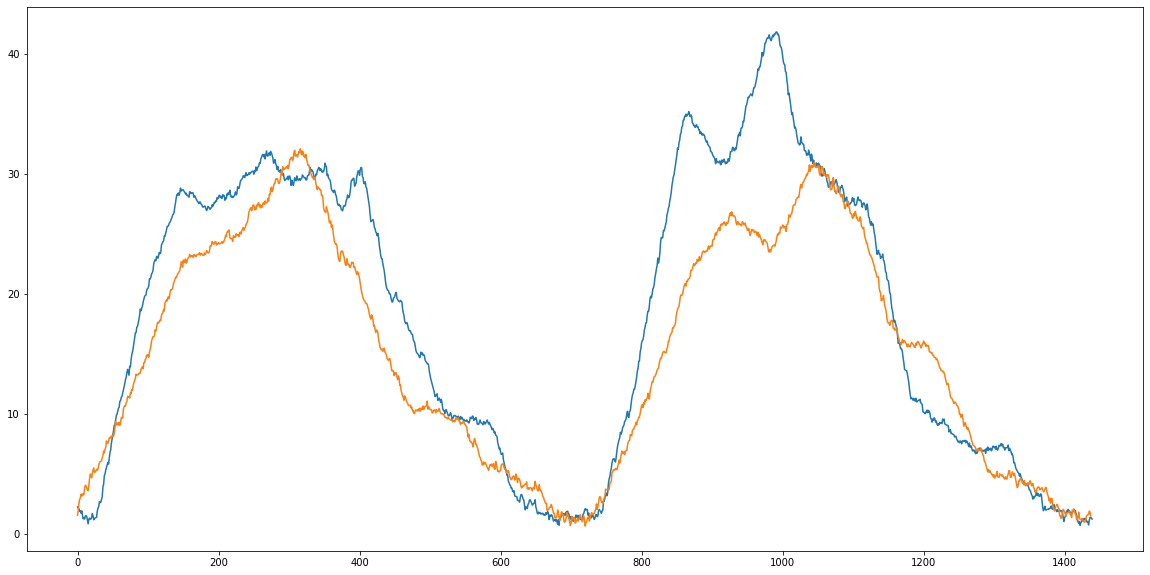

In [27]:
trainPredictPlot = np.empty_like(scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(scaled)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(20,10))
# plt.plot(scaler.inverse_transform(scaled))
plt.plot(trainPredict[:1440])
plt.plot(testPredict)
plt.show()